Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

This Dataset contains 18249 rows and 14 columns.out of which 1 is target variable and remaining 13 are independent variables.

EDA(Exploratory Data Analysis)

In [4]:
df.shape

(18249, 14)

This Dataset contains 18249 rows and 14 columns.out of which 1 is target variable and remaining 13 are independent variables.

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

check the null values

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

As we can see there are no null values present in this dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

In [11]:
df['Date'].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

In [12]:
df.loc[df['Date']==" "]

Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

In [13]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [15]:
df.set_index('Date',inplace=True)

In [16]:
df

Unnamed: 0  AveragePrice  Total Volume     4046       4225  \
Date                                                                     
2015-12-27           0          1.33      64236.62  1036.74   54454.85   
2015-12-20           1          1.35      54876.98   674.28   44638.81   
2015-12-13           2          0.93     118220.22   794.70  109149.67   
2015-12-06           3          1.08      78992.15  1132.00   71976.41   
2015-11-29           4          1.28      51039.60   941.48   43838.39   
...                ...           ...           ...      ...        ...   
2018-02-04           7          1.63      17074.83  2046.96    1529.20   
2018-01-28           8          1.71      13888.04  1191.70    3431.50   
2018-01-21           9          1.87      13766.76  1191.92    2452.79   
2018-01-14          10          1.93      16205.22  1527.63    2981.04   
2018-01-07          11          1.62      17489.58  2894.77    2356.13   

              4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Date                                                                  
2015-12-27   48.16     8696.87     8603.62       93.25          0.0   
2015-12-20   58.33     9505.56     9408.07       97.49          0.0   
2015-12-13  130.50     8145.35     8042.21      103.14          0.0   
2015-12-06   72.58     5811.16     5677.40      133.76          0.0   
2015-11-29   75.78     6183.95     5986.26      197.69          0.0   
...            ...         ...         ...         ...          ...   
2018-02-04    0.00    13498.67    13066.82      431.85          0.0   
2018-01-28    0.00     9264.84     8940.04      324.80          0.0   
2018-01-21  727.94     9394.11     9351.80       42.31          0.0   
2018-01-14  727.01    10969.54    10919.54       50.00          0.0   
2018-01-07  224.53    12014.15    11988.14       26.01          0.0   

                    type  year            region  
Date                                              
2015-12-27  conventional  2015            Albany  
2015-12-20  conventional  2015            Albany  
2015-12-13  conventional  2015            Albany  
2015-12-06  conventional  2015            Albany  
2015-11-29  conventional  2015            Albany  
...                  ...   ...               ...  
2018-02-04       organic  2018  WestTexNewMexico  
2018-01-28       organic  2018  WestTexNewMexico  
2018-01-21       organic  2018  WestTexNewMexico  
2018-01-14       organic  2018  WestTexNewMexico  
2018-01-07       organic  2018  WestTexNewMexico  

[18249 rows x 13 columns]

<Axes: ylabel='Date'>

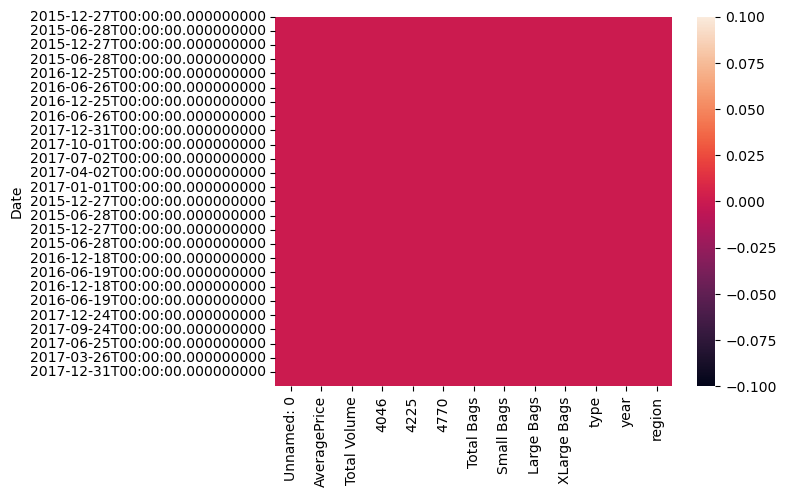

In [17]:
sns.heatmap(df.isnull())

As we can clearly visualize that there is no missing data present in the dataset.

In [18]:
df.nunique().to_frame('number of unique values')

number of unique values
Unnamed: 0                         53
AveragePrice                      259
Total Volume                    18237
4046                            17702
4225                            18103
4770                            12071
Total Bags                      18097
Small Bags                      17321
Large Bags                      15082
XLarge Bags                      5588
type                                2
year                                4
region                             54

In [19]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Seperating Numerical and Categorical columns

In [20]:
cat=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat.append(i)
print('Catogerical_col:',cat)
print('\n')

Catogerical_col: ['type', 'region']




In [21]:
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num.append(i)
print('Numerical_col:',num)
print('\n')

Numerical_col: ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']




checking the number of unique value in each column

In [22]:
df.nunique().to_frame('Number of unique values')

Number of unique values
Unnamed: 0                         53
AveragePrice                      259
Total Volume                    18237
4046                            17702
4225                            18103
4770                            12071
Total Bags                      18097
Small Bags                      17321
Large Bags                      15082
XLarge Bags                      5588
type                                2
year                                4
region                             54

Checking the counts of Targets

In [23]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Description of Dataset. Here it gives Statistical summary of Numerical columns.

In [24]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

This is the Staststical information of the numerical columns.This summary of the dataset looks perfect.since there is no negative /invalid values present. here mean value is same as median so no skewness present in the dataset. and 75% and Max values there is huge difference hence outliers are present in the dataset.

Data Visualization

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

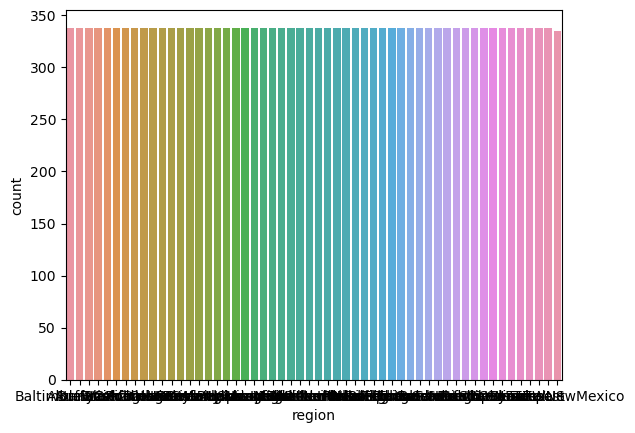

In [25]:
ux=sns.countplot(x='region',data=df)
print(df['region'].value_counts())
plt.show()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


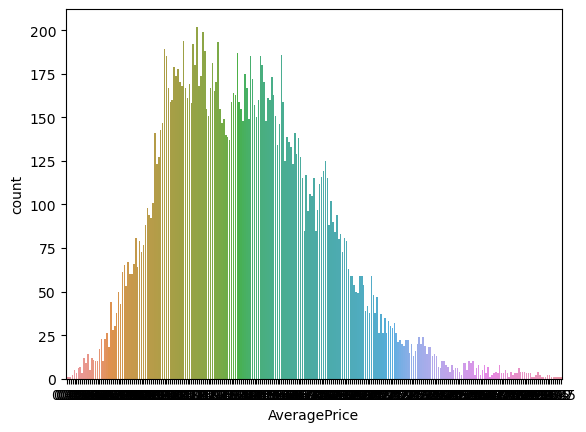

In [26]:
ux=sns.countplot(x='AveragePrice',data=df)
print(df['AveragePrice'].value_counts())
plt.show()

conventional    9126
organic         9123
Name: type, dtype: int64


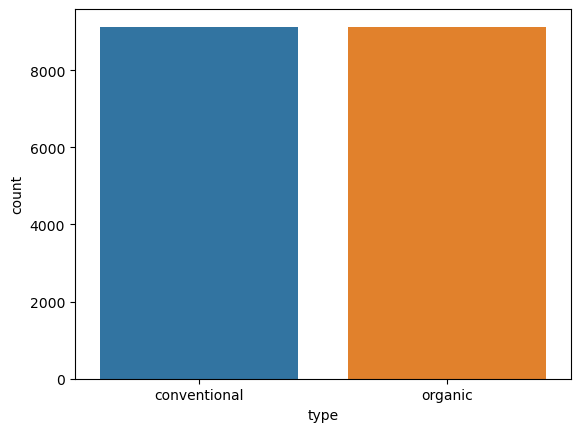

In [27]:
ux=sns.countplot(x='type',data=df)
print(df['type'].value_counts())
plt.show()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


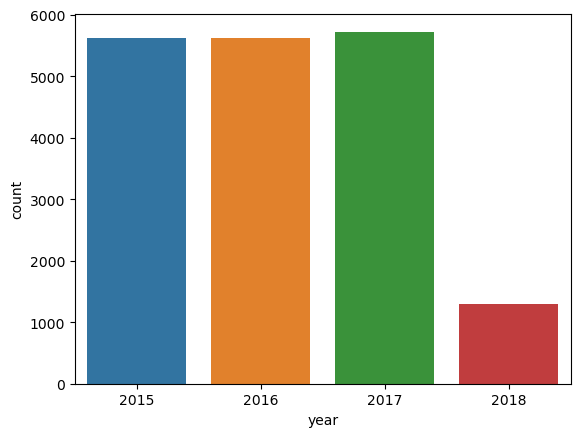

In [28]:
ux=sns.countplot(x='year',data=df)
print(df['year'].value_counts())
plt.show()

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


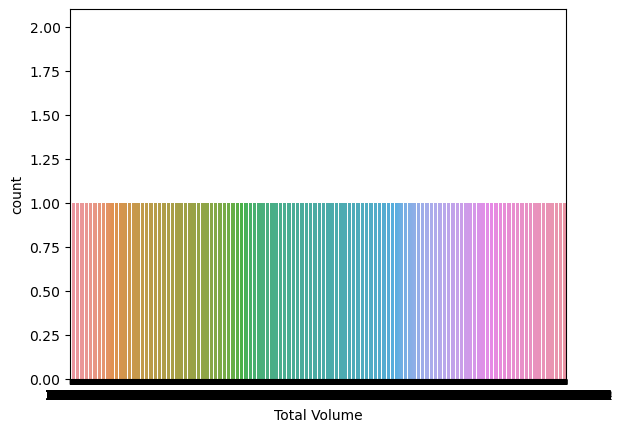

In [29]:
ux=sns.countplot(x='Total Volume',data=df)
print(df['Total Volume'].value_counts())
plt.show()

0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: Total Bags, Length: 18097, dtype: int64


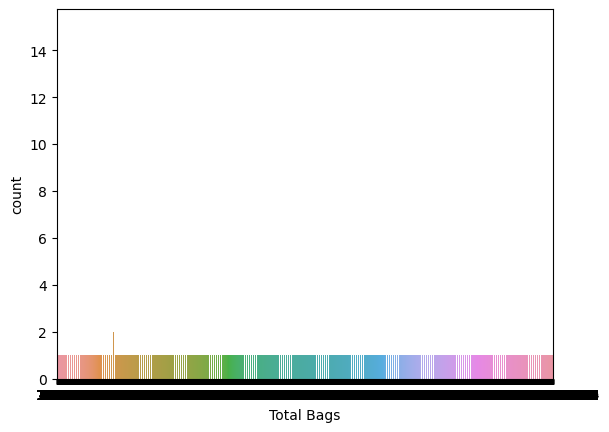

In [30]:
ux=sns.countplot(x='Total Bags',data=df)
print(df['Total Bags'].value_counts())
plt.show()

0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: Small Bags, Length: 17321, dtype: int64


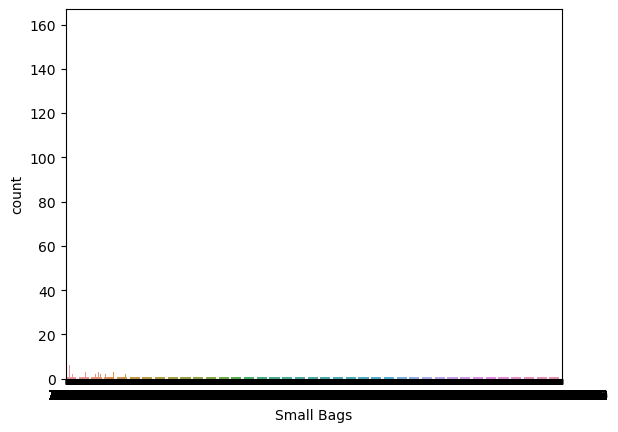

In [31]:
ux=sns.countplot(x='Small Bags',data=df)
print(df['Small Bags'].value_counts())
plt.show()

0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: Large Bags, Length: 15082, dtype: int64


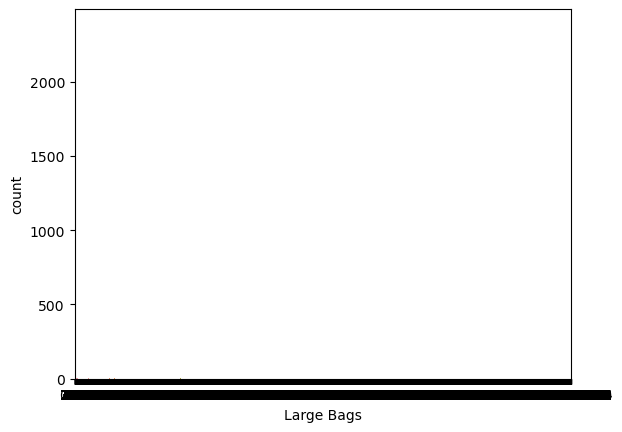

In [32]:
ux=sns.countplot(x='Large Bags',data=df)
print(df['Large Bags'].value_counts())
plt.show()

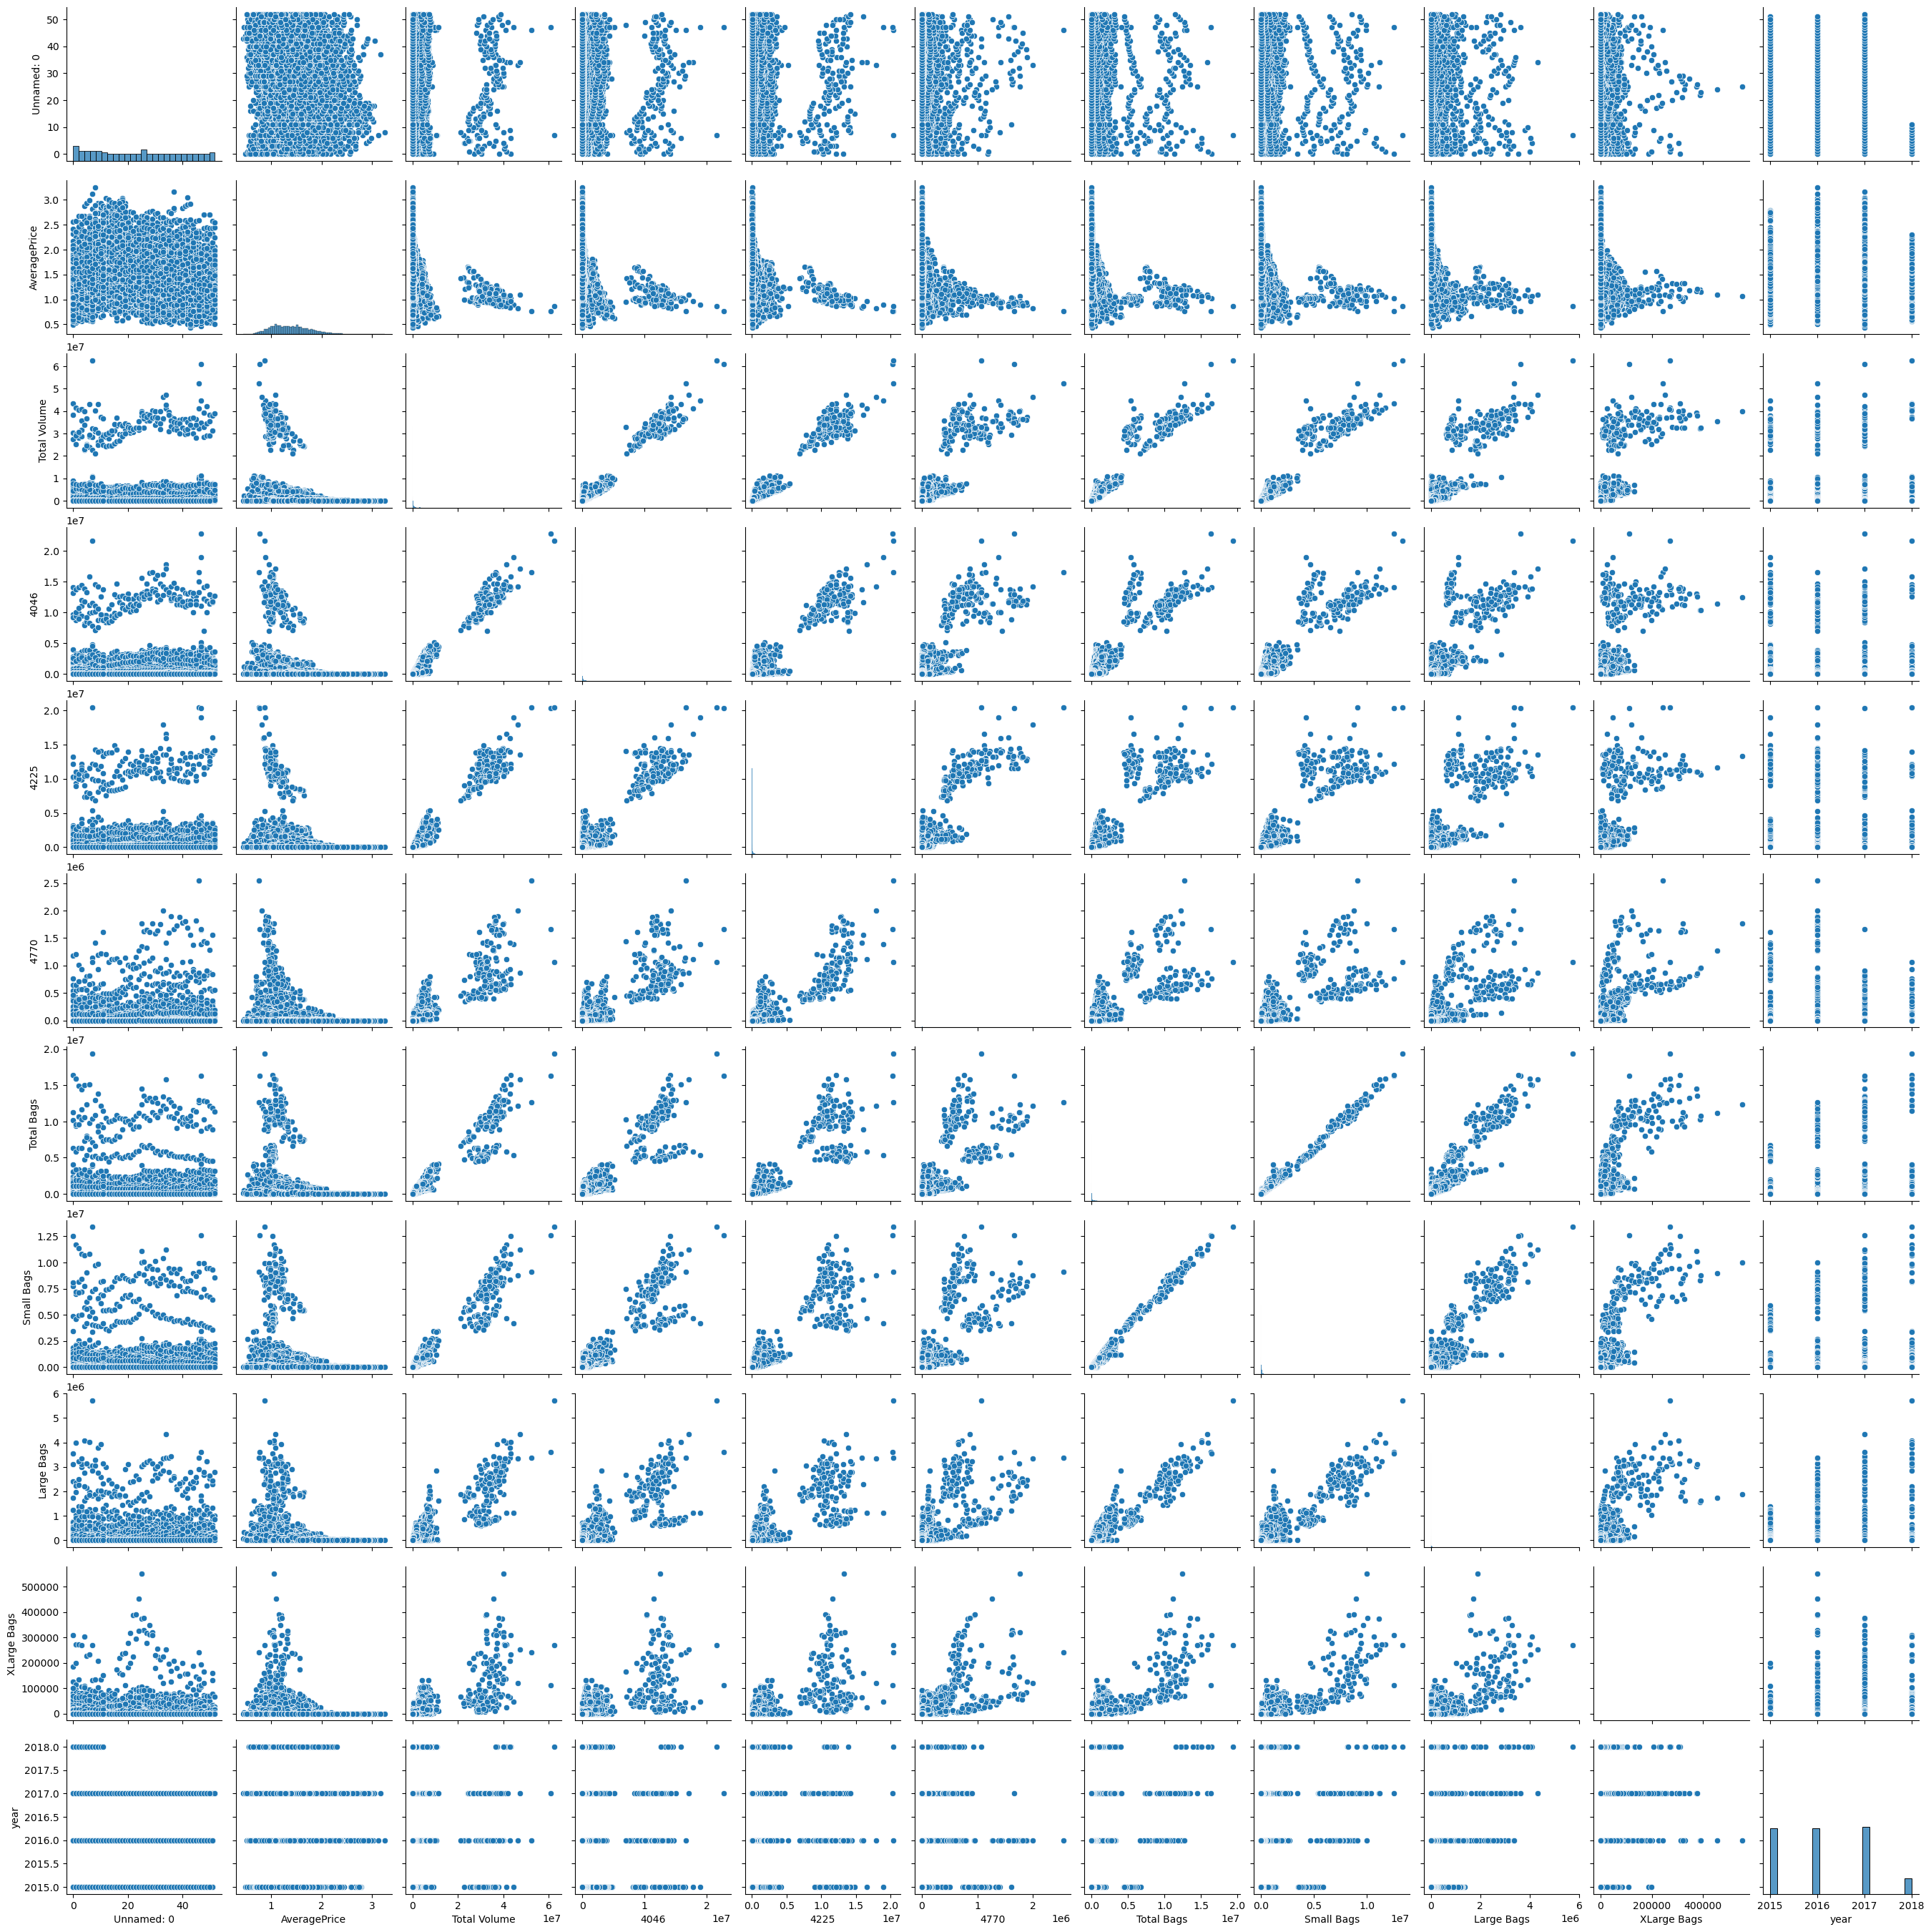

In [33]:
sns.pairplot(df)
plt.show()

Here we are checking outliers in the data.

Unnamed: 0         Axes(0.125,0.653529;0.133621x0.226471)
AveragePrice    Axes(0.285345,0.653529;0.133621x0.226471)
Total Volume     Axes(0.44569,0.653529;0.133621x0.226471)
4046            Axes(0.606034,0.653529;0.133621x0.226471)
4225            Axes(0.766379,0.653529;0.133621x0.226471)
4770               Axes(0.125,0.381765;0.133621x0.226471)
Total Bags      Axes(0.285345,0.381765;0.133621x0.226471)
Small Bags       Axes(0.44569,0.381765;0.133621x0.226471)
Large Bags      Axes(0.606034,0.381765;0.133621x0.226471)
XLarge Bags     Axes(0.766379,0.381765;0.133621x0.226471)
year                   Axes(0.125,0.11;0.133621x0.226471)
dtype: object

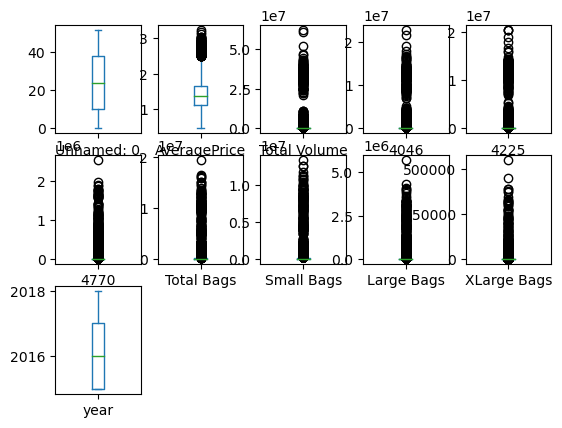

In [34]:
df.plot(kind='box',subplots=True,layout=(3,5))

As you can see outliers are present in this dataset to remove the outliers we use Zscore method to remove the outliers.

Encoding technique (here we are using encoding method to change categorical data to numerical data.)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [36]:
df

Unnamed: 0  AveragePrice  Total Volume     4046       4225  \
Date                                                                     
2015-12-27           0          1.33      64236.62  1036.74   54454.85   
2015-12-20           1          1.35      54876.98   674.28   44638.81   
2015-12-13           2          0.93     118220.22   794.70  109149.67   
2015-12-06           3          1.08      78992.15  1132.00   71976.41   
2015-11-29           4          1.28      51039.60   941.48   43838.39   
...                ...           ...           ...      ...        ...   
2018-02-04           7          1.63      17074.83  2046.96    1529.20   
2018-01-28           8          1.71      13888.04  1191.70    3431.50   
2018-01-21           9          1.87      13766.76  1191.92    2452.79   
2018-01-14          10          1.93      16205.22  1527.63    2981.04   
2018-01-07          11          1.62      17489.58  2894.77    2356.13   

              4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  \
Date                                                                        
2015-12-27   48.16     8696.87     8603.62       93.25          0.0   0.0   
2015-12-20   58.33     9505.56     9408.07       97.49          0.0   0.0   
2015-12-13  130.50     8145.35     8042.21      103.14          0.0   0.0   
2015-12-06   72.58     5811.16     5677.40      133.76          0.0   0.0   
2015-11-29   75.78     6183.95     5986.26      197.69          0.0   0.0   
...            ...         ...         ...         ...          ...   ...   
2018-02-04    0.00    13498.67    13066.82      431.85          0.0   1.0   
2018-01-28    0.00     9264.84     8940.04      324.80          0.0   1.0   
2018-01-21  727.94     9394.11     9351.80       42.31          0.0   1.0   
2018-01-14  727.01    10969.54    10919.54       50.00          0.0   1.0   
2018-01-07  224.53    12014.15    11988.14       26.01          0.0   1.0   

            year  region  
Date                      
2015-12-27  2015     0.0  
2015-12-20  2015     0.0  
2015-12-13  2015     0.0  
2015-12-06  2015     0.0  
2015-11-29  2015     0.0  
...          ...     ...  
2018-02-04  2018    53.0  
2018-01-28  2018    53.0  
2018-01-21  2018    53.0  
2018-01-14  2018    53.0  
2018-01-07  2018    53.0  

[18249 rows x 13 columns]

Checking Skewness

In [37]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

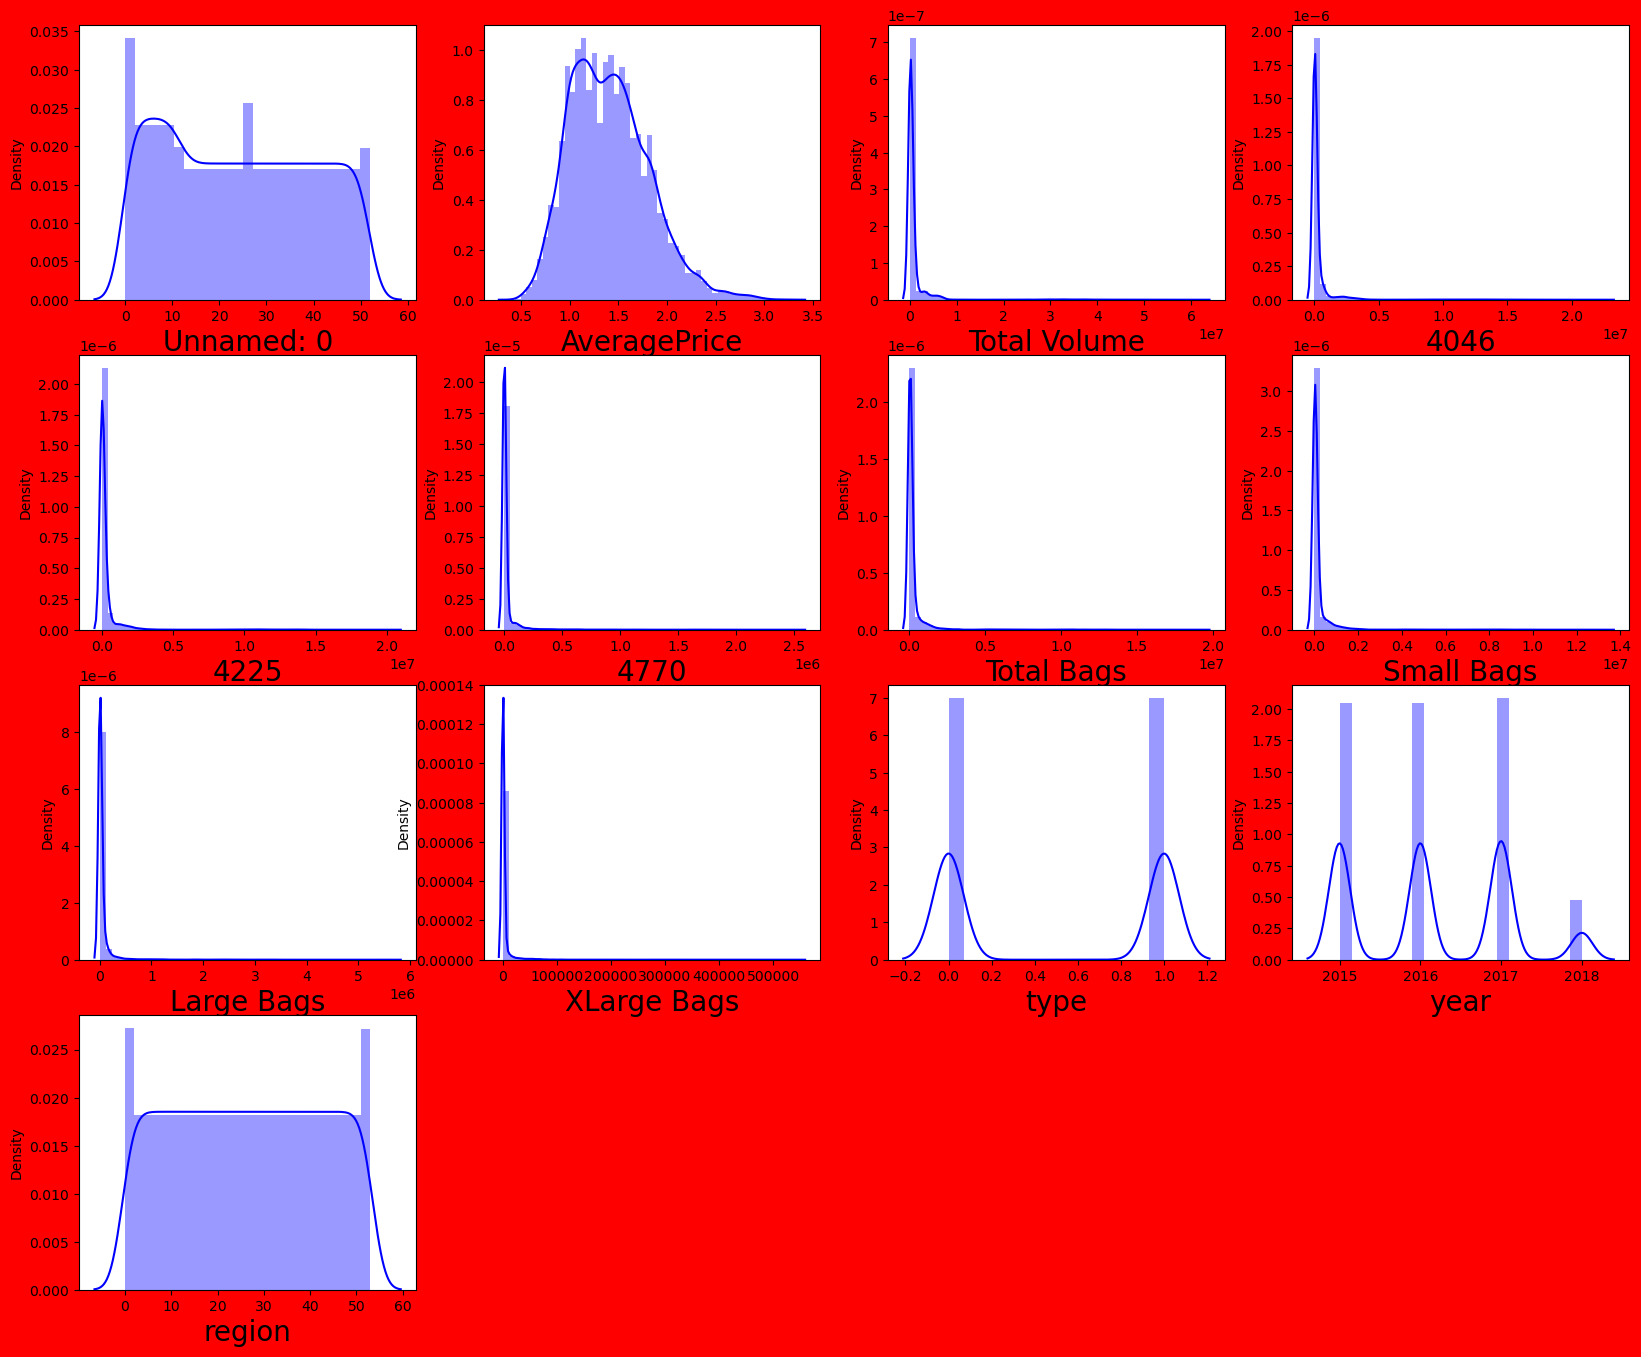

In [38]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [39]:
df['Total Volume']=np.cbrt(df['Total Volume'])

In [40]:
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])

In [41]:
df['Large Bags']=np.cbrt(df['Large Bags'])

In [42]:
df['Small Bags']=np.cbrt(df['Small Bags'])

In [43]:
df['4770']=np.cbrt(df['4770'])

In [44]:
df['4225']=np.cbrt(df['4225'])

In [45]:
df['4046']=np.cbrt(df['4046'])

In [46]:
df['Total Bags']=np.cbrt(df['Total Bags'])

In [47]:
df.skew()

Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64

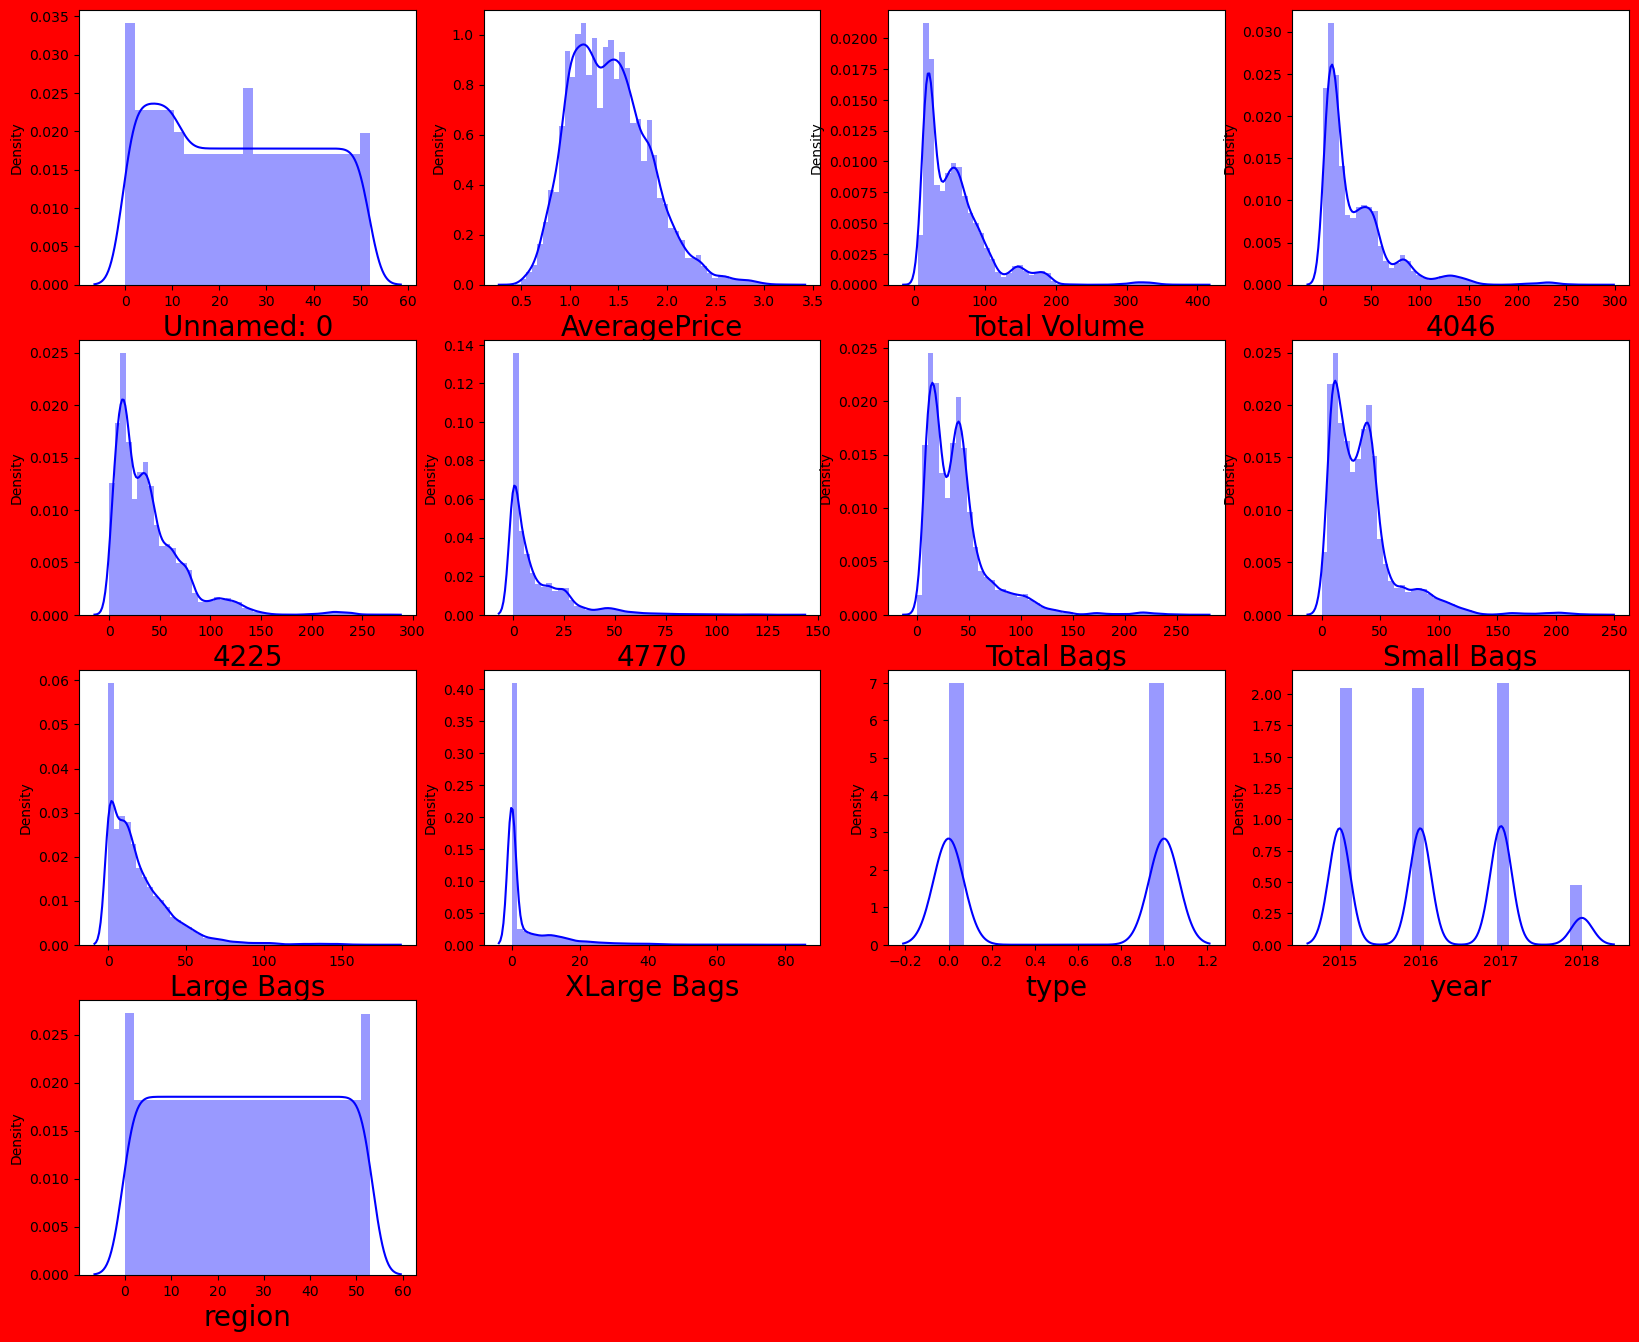

In [48]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [49]:
df['Total Volume']=np.sqrt(df['Total Volume'])

In [50]:
df.skew()

Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    0.950027
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [51]:
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])

In [52]:
df['Large Bags']=np.sqrt(df['Large Bags'])

In [53]:
df['Small Bags']=np.sqrt(df['Small Bags'])

In [54]:
df['4770']=np.sqrt(df['4770'])

In [55]:
df['4225']=np.cbrt(df['4225'])

In [56]:
df['4046']=np.cbrt(df['4046'])

In [57]:
df['Total Bags']=np.sqrt(df['Total Bags'])

In [58]:
df.skew()

Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    0.950027
4046            0.296549
4225            0.248376
4770            0.605972
Total Bags      0.890696
Small Bags      0.690221
Large Bags      0.316832
XLarge Bags     1.377477
type            0.000329
year            0.215339
region          0.000030
dtype: float64

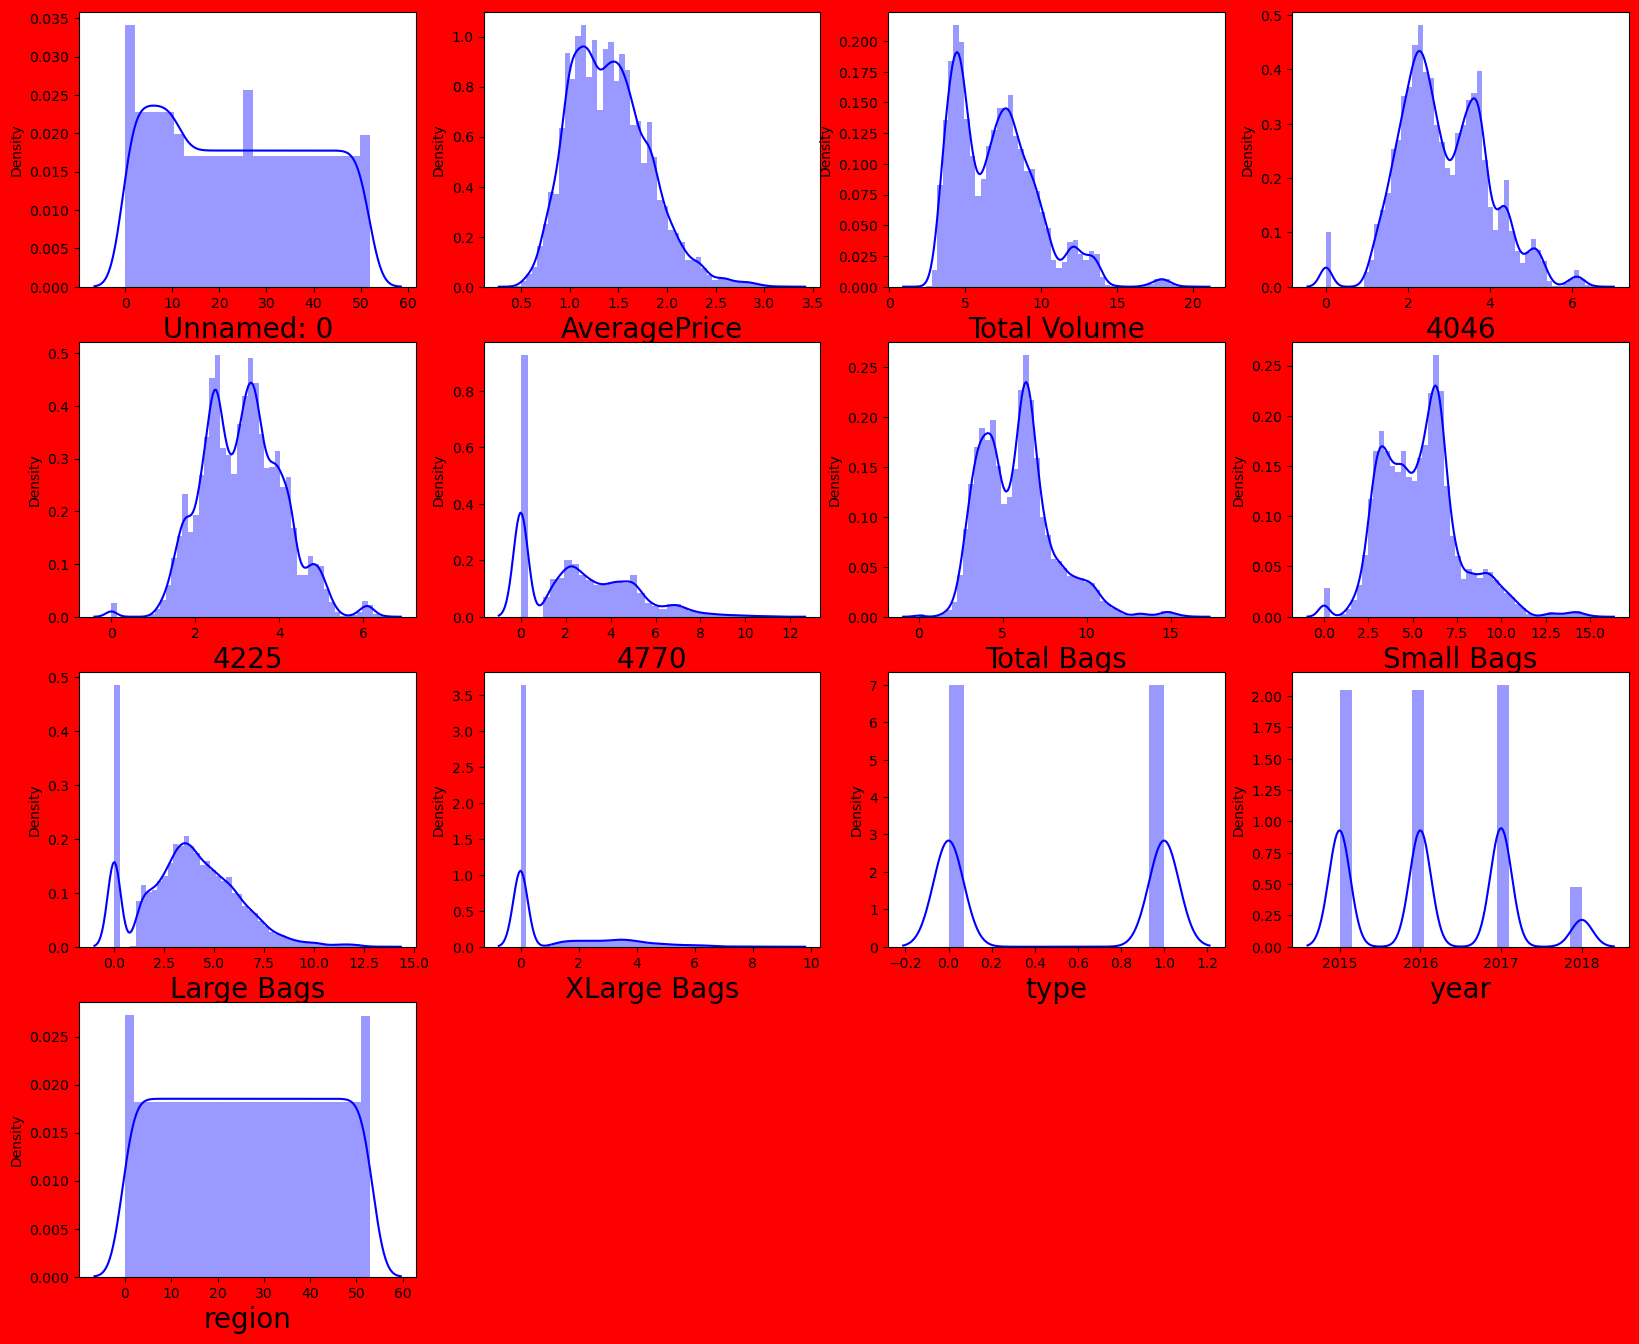

In [59]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [60]:
from scipy.stats import zscore
out_features=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out_features))
z

Total Volume      4046      4225      4770  Total Bags  \
Date                                                                 
2015-12-27      0.275399  0.678881  0.247619  0.310250    0.601460   
2015-12-20      0.334355  0.773376  0.170103  0.283521    0.570570   
2015-12-13      0.031861  0.737814  0.532667  0.161360    0.623930   
2015-12-06      0.195601  0.659010  0.359339  0.251967    0.735928   
2015-11-29      0.360978  0.700447  0.163131  0.245601    0.715776   
...                  ...       ...       ...       ...         ...   
2018-02-04      0.726346  0.519922  0.915081  1.134031    0.444162   
2018-01-28      0.788107  0.647302  0.690885  1.134031    0.579528   
2018-01-21      0.790683  0.647260  0.786473  0.161298    0.574693   
2018-01-14      0.742176  0.589777  0.731382  0.161022    0.519831   
2018-01-07      0.719032  0.434205  0.797682  0.069292    0.486977   

            Small Bags  Large Bags  XLarge Bags  
Date                                             
2015-12-27    0.426584    0.704071      0.63598  
2015-12-20    0.395948    0.697321      0.63598  
2015-12-13    0.449411    0.688697      0.63598  
2015-12-06    0.563210    0.647836      0.63598  
2015-11-29    0.546321    0.583006      0.63598  
...                ...         ...          ...  
2018-02-04    0.279353    0.439952      0.63598  
2018-01-28    0.413493    0.494276      0.63598  
2018-01-21    0.398019    0.816052      0.63598  
2018-01-14    0.343860    0.793602      0.63598  
2018-01-07    0.310553    0.878010      0.63598  

[18249 rows x 8 columns]

In [61]:
threshold=3
np.where(z>3)

(array([  780,  2340,  2341, ..., 16223, 16570, 16572], dtype=int64),
 array([7, 7, 7, ..., 2, 2, 2], dtype=int64))

In [62]:
df1=df[(z<3).all(axis=1)]

In [63]:
df1.shape

(17959, 13)

In [64]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 18249
new dataframe: 17959


In [65]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 1.5891281714066525


As we can see there is less than 10% of data loss after removing the outliers so it is considerable.

Checking the Correlation b/w Target variable and Independent variable.

In [66]:
df.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.010805  0.017693  0.027400   
AveragePrice   -0.133008      1.000000     -0.554411 -0.552586 -0.460275   
Total Volume    0.010805     -0.554411      1.000000  0.901371  0.930542   
4046            0.017693     -0.552586      0.901371  1.000000  0.790908   
4225            0.027400     -0.460275      0.930542  0.790908  1.000000   
4770            0.044337     -0.495709      0.850977  0.771296  0.826159   
Total Bags     -0.028622     -0.541185      0.960835  0.839858  0.856506   
Small Bags     -0.035509     -0.491805      0.936593  0.820647  0.830197   
Large Bags     -0.026673     -0.481702      0.741806  0.663025  0.668378   
XLarge Bags    -0.047670     -0.375544      0.713129  0.637709  0.645217   
type           -0.000288      0.615845     -0.749134 -0.712142 -0.736521   
year           -0.171667      0.093197      0.066411  0.011931  0.007077   
region         -0.000489     -0.011716      0.133983  0.198612  0.084083   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.044337   -0.028622   -0.035509   -0.026673    -0.047670   
AveragePrice -0.495709   -0.541185   -0.491805   -0.481702    -0.375544   
Total Volume  0.850977    0.960835    0.936593    0.741806     0.713129   
4046          0.771296    0.839858    0.820647    0.663025     0.637709   
4225          0.826159    0.856506    0.830197    0.668378     0.645217   
4770          1.000000    0.800985    0.794867    0.603831     0.688295   
Total Bags    0.800985    1.000000    0.966170    0.785503     0.703402   
Small Bags    0.794867    0.966170    1.000000    0.656213     0.690372   
Large Bags    0.603831    0.785503    0.656213    1.000000     0.532932   
XLarge Bags   0.688295    0.703402    0.690372    0.532932     1.000000   
type         -0.745238   -0.691603   -0.694731   -0.508589    -0.619375   
year         -0.049642    0.191710    0.177084    0.196262     0.167458   
region        0.071069    0.138908    0.119202    0.153963     0.022754   

                  type      year    region  
Unnamed: 0   -0.000288 -0.171667 -0.000489  
AveragePrice  0.615845  0.093197 -0.011716  
Total Volume -0.749134  0.066411  0.133983  
4046         -0.712142  0.011931  0.198612  
4225         -0.736521  0.007077  0.084083  
4770         -0.745238 -0.049642  0.071069  
Total Bags   -0.691603  0.191710  0.138908  
Small Bags   -0.694731  0.177084  0.119202  
Large Bags   -0.508589  0.196262  0.153963  
XLarge Bags  -0.619375  0.167458  0.022754  
type          1.000000 -0.000032 -0.000280  
year         -0.000032  1.000000 -0.000055  
region       -0.000280 -0.000055  1.000000

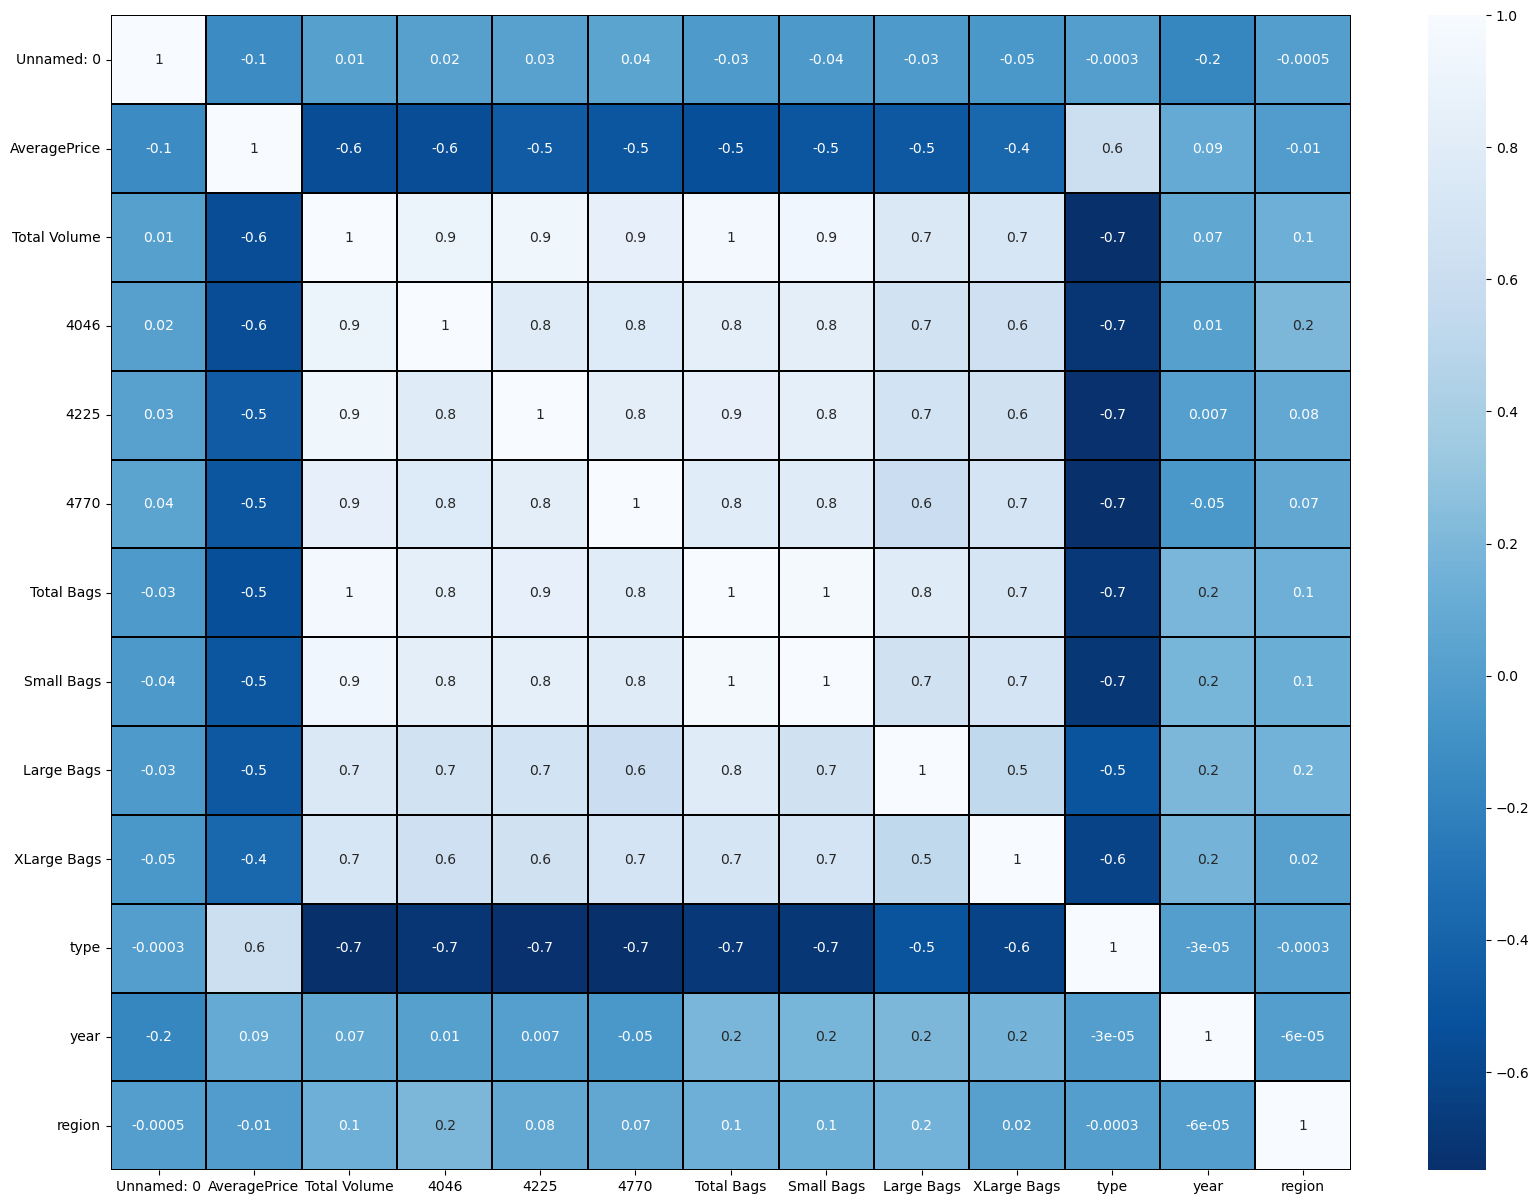

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [68]:
x=df1.drop('region',axis=1)

In [69]:
y=df1['region']

Feature scaling using StandardScaler method.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [71]:
x

Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
0       -1.565929     -0.197424     -0.255517 -0.677519  0.290848 -0.292353   
1       -1.501333     -0.147866     -0.319473 -0.776330  0.207967 -0.264255   
2       -1.436738     -1.188603      0.008679 -0.739144  0.595627 -0.135840   
3       -1.372142     -0.816911     -0.168949 -0.656741  0.410302 -0.231085   
4       -1.307547     -0.321322     -0.348355 -0.700070  0.200513 -0.224394   
...           ...           ...           ...       ...       ...       ...   
17954   -1.113760      0.545960     -0.744715 -0.511299 -0.952333 -1.158315   
17955   -1.049164      0.744195     -0.811714 -0.644498 -0.712618 -1.158315   
17956   -0.984569      1.140667     -0.814508 -0.644454 -0.814822  0.203340   
17957   -0.919973      1.289344     -0.761887 -0.584346 -0.755918  0.203050   
17958   -0.855378      0.521180     -0.736780 -0.421667 -0.826807 -0.039057   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year  
0       -0.608351   -0.416622   -0.706287    -0.635696 -1.009230 -1.219874  
1       -0.574844   -0.383676   -0.699194    -0.635696 -1.009230 -1.219874  
2       -0.632724   -0.441171   -0.690132    -0.635696 -1.009230 -1.219874  
3       -0.754211   -0.563554   -0.647196    -0.635696 -1.009230 -1.219874  
4       -0.732351   -0.545391   -0.579074    -0.635696 -1.009230 -1.219874  
...           ...         ...         ...          ...       ...       ...  
17954   -0.437728   -0.258286   -0.428757    -0.635696  0.990854  1.973982  
17955   -0.584561   -0.402544   -0.485838    -0.635696  0.990854  1.973982  
17956   -0.579317   -0.385903   -0.823954    -0.635696  0.990854  1.973982  
17957   -0.519807   -0.327659   -0.800363    -0.635696  0.990854  1.973982  
17958   -0.484169   -0.291839   -0.889057    -0.635696  0.990854  1.973982  

[17959 rows x 12 columns]

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values      features
0     1.074981    Unnamed: 0
1     2.116191  AveragePrice
2    61.276494  Total Volume
3     6.804174          4046
4    12.956551          4225
5     4.083026          4770
6    47.714886    Total Bags
7    23.565630    Small Bags
8     4.092444    Large Bags
9     2.128295   XLarge Bags
10    3.598185          type
11    1.448252          year

As we can seee there is multicorrelation present in the dataset.here pdays has highly correlated and VIF value here is high so we can Drop this column.

In [73]:
x.drop('Total Volume',axis=1,inplace=True)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values      features
0     1.073815    Unnamed: 0
1     2.077067  AveragePrice
2     3.788076          4046
3     5.330226          4225
4     4.080307          4770
5    37.806624    Total Bags
6    23.339942    Small Bags
7     4.078033    Large Bags
8     2.100114   XLarge Bags
9     3.596383          type
10    1.409474          year

In [75]:
x.drop('Total Bags',axis=1,inplace=True)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values      features
0    1.073452    Unnamed: 0
1    1.954230  AveragePrice
2    3.756101          4046
3    4.909694          4225
4    4.080283          4770
5    4.795816    Small Bags
6    2.141146    Large Bags
7    2.080827   XLarge Bags
8    3.504925          type
9    1.382404          year

so after dropping pdays now we have solved multicolinearity issue .We can now move ahead for Model building



In [77]:
y.value_counts()

0.0     338
23.0    338
28.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
40.0    338
41.0    338
42.0    338
43.0    338
44.0    338
47.0    338
48.0    338
49.0    338
1.0     338
26.0    338
22.0    338
14.0    338
2.0     338
3.0     338
4.0     338
5.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
13.0    338
12.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
34.0    336
24.0    336
25.0    336
53.0    335
46.0    332
45.0    331
50.0    329
52.0    329
6.0     326
15.0    314
27.0    290
51.0    169
Name: region, dtype: int64

Here we can see that data is not balanced since it is a classification problem we will balance the data using Oversampling method.

OverSampling here we use SMOTE method.

In [78]:
import sklearn
!pip install imbalanced_learn
from imblearn.over_sampling import SMOTE
smt=SMOTE()


In [79]:
trainx,trainy=smt.fit_resample(x,y)

In [80]:
trainx.value_counts()

Unnamed: 0  AveragePrice  4046       4225       4770       Small Bags  Large Bags  XLarge Bags  type       year     
-1.565929   -2.278900      1.597614   1.060219   1.003035   0.506886    0.838128   -0.635696    -1.009230  -1.219874    1
 0.565725   -0.197424      1.680955   1.251602   0.864047   1.758379    1.056335    2.229528    -1.009230   0.909363    1
            -0.123086     -1.022552  -0.576570   0.041819  -0.849689   -0.271059   -0.635696     0.990854  -0.155256    1
                          -1.230140  -0.649922  -1.158315  -0.990756   -0.132433   -0.635696     0.990854  -0.155256    1
            -0.147866      0.854067  -0.019031   0.045640   0.325809    0.431341    2.393729    -1.009230   0.909363    1
                                                                                                                       ..
-0.661591    1.239785      0.108656  -1.785216  -1.158315  -0.344351   -1.112621   -0.635696     0.990854   0.909363    1
             1.264564     -1.

In [81]:
trainy.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
52.0    338
53.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
51.0    338
Name: region, dtype: int64

In [82]:
trainy

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18247    52.0
18248    52.0
18249    53.0
18250    53.0
18251    53.0
Name: region, Length: 18252, dtype: float64

<Axes: ylabel='count'>

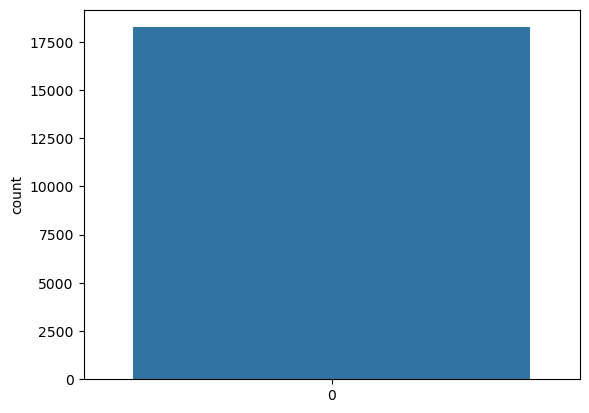

In [83]:
sns.countplot(trainy)

Model Bulding

As you can see this is Classification problem in this we have catgerocial data present so we use Classification model here

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [86]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))

0.9088715664439495


In [87]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9125835189309577
[[ 98   0   0 ...   0   0   0]
 [  0  76   0 ...   0   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ...  51   0   0]
 [  0   0   0 ...   1  94   0]
 [  0   2   3 ...   0   0  86]]
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       106
         1.0       0.80      0.89      0.84        85
         2.0       0.95      0.99      0.97       103
         3.0       0.94      0.88      0.91       110
         4.0       0.98      0.95      0.96       100
         5.0       0.95      0.82      0.88       116
         6.0       0.97      0.98      0.97        90
         7.0       0.93      0.93      0.93       106
         8.0       0.96      1.00      0.98        94
         9.0       0.91      0.86      0.88       105
        10.0       0.89      0.88      0.88        97
        11.0       0.88      0.94      0.91       102
        12.0       0.99      0.96      0.98       107
        13.0       0.89      0.8

In [88]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.7843355605048256
[[102   0   0 ...   0   0   0]
 [  0  56   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  51   0   0]
 [  0   0   0 ...   1  94   0]
 [  0   1   1 ...   0   0  59]]
              precision    recall  f1-score   support

         0.0       0.69      0.96      0.81       106
         1.0       0.42      0.66      0.52        85
         2.0       0.94      0.97      0.96       103
         3.0       0.87      0.54      0.66       110
         4.0       0.94      0.85      0.89       100
         5.0       0.89      0.67      0.76       116
         6.0       0.95      1.00      0.97        90
         7.0       0.72      0.82      0.77       106
         8.0       0.92      1.00      0.96        94
         9.0       0.73      0.76      0.74       105
        10.0       0.67      0.58      0.62        97
        11.0       0.78      0.88      0.83       102
        12.0       0.91      0.95      0.93       107
        13.0       0.68      0.4

In [89]:
ac=AdaBoostClassifier()
ac.fit(x_train,y_train)
predac=ac.predict(x_test)
print(accuracy_score(y_test,predac))
print(confusion_matrix(y_test,predac))
print(classification_report(y_test,predac))


0.04361544172234595
[[ 0  0  0 ...  0  0  0]
 [ 0 34  0 ...  4  0  0]
 [ 0  7  0 ...  0  0  0]
 ...
 [ 0 17  0 ... 31  0  0]
 [ 0  5  0 ... 42  0  0]
 [ 0  6  0 ... 12  0 28]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       106
         1.0       0.05      0.40      0.09        85
         2.0       0.00      0.00      0.00       103
         3.0       0.00      0.00      0.00       110
         4.0       0.00      0.00      0.00       100
         5.0       0.00      0.00      0.00       116
         6.0       0.20      0.06      0.09        90
         7.0       0.00      0.00      0.00       106
         8.0       0.00      0.00      0.00        94
         9.0       0.00      0.00      0.00       105
        10.0       0.00      0.00      0.00        97
        11.0       0.00      0.00      0.00       102
        12.0       0.00      0.00      0.00       107
        13.0       0.00      0.00      0.00       105
        14.0 

In [90]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))


0.8537490720118782
[[ 94   0   0 ...   0   0   0]
 [  0  72   0 ...   0   0   1]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  51   0   0]
 [  0   0   0 ...   2  85   0]
 [  0   3   6 ...   0   0  68]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       106
         1.0       0.67      0.85      0.75        85
         2.0       0.85      0.97      0.90       103
         3.0       0.90      0.89      0.89       110
         4.0       0.95      0.89      0.92       100
         5.0       0.88      0.78      0.83       116
         6.0       0.93      0.98      0.95        90
         7.0       0.87      0.92      0.89       106
         8.0       0.95      0.99      0.97        94
         9.0       0.85      0.83      0.84       105
        10.0       0.77      0.80      0.79        97
        11.0       0.86      0.94      0.90       102
        12.0       0.93      0.89      0.91       107
        13.0       0.85      0.8

In [91]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))


0.924090571640683
[[103   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   2]
 [  0   0 103 ...   0   0   0]
 ...
 [  0   0   0 ...  51   0   0]
 [  0   0   0 ...   1  94   0]
 [  0   1   3 ...   0   0  88]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       106
         1.0       0.80      0.92      0.86        85
         2.0       0.95      1.00      0.98       103
         3.0       0.96      0.92      0.94       110
         4.0       0.98      0.98      0.98       100
         5.0       0.97      0.84      0.90       116
         6.0       0.99      1.00      0.99        90
         7.0       0.96      0.93      0.95       106
         8.0       0.95      1.00      0.97        94
         9.0       0.92      0.87      0.89       105
        10.0       0.90      0.87      0.88        97
        11.0       0.91      0.94      0.92       102
        12.0       0.97      0.96      0.97       107
        13.0       0.87      0.88

In [92]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc=dc.predict(x_test)
print(accuracy_score(y_test,preddc))
print(confusion_matrix(y_test,preddc))
print(classification_report(y_test,preddc))


0.7839643652561247
[[81  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  2]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  1  0 ...  0 83  0]
 [ 0  4  7 ...  0  0 64]]
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       106
         1.0       0.61      0.69      0.65        85
         2.0       0.80      0.88      0.84       103
         3.0       0.84      0.79      0.81       110
         4.0       0.88      0.80      0.84       100
         5.0       0.77      0.68      0.72       116
         6.0       0.93      0.92      0.93        90
         7.0       0.79      0.85      0.82       106
         8.0       0.88      0.97      0.92        94
         9.0       0.86      0.74      0.80       105
        10.0       0.62      0.67      0.65        97
        11.0       0.82      0.85      0.84       102
        12.0       0.91      0.83      0.87       107
        13.0       0.79      0.71      0.75       105
        14.0  

In [93]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predRFC)-score.mean())

[0.65952116 0.83073497 0.78062361 0.68624722 0.48426622]
0.6882786339766763
difference b/w Accuracy_score and cross_val_score is: 0.22430488495428136


In [94]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predsvc)-score.mean())

[0.63641425 0.70768374 0.66842984 0.57071269 0.41102757]
0.5988536206886929
difference b/w Accuracy_score and cross_val_score is: 0.1854819398161327


In [95]:
score=cross_val_score(ac,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predac)-score.mean())

[0.05373051 0.02533408 0.05289532 0.07739421 0.04260652]
0.05039212731159748
difference b/w Accuracy_score and cross_val_score is: -0.006776685589251527


In [96]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predbc)-score.mean())

[0.55122494 0.76113586 0.73719376 0.61052339 0.45084935]
0.622185459317683
difference b/w Accuracy_score and cross_val_score is: 0.23156361269419523


In [97]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predet)-score.mean())

[0.70935412 0.81597996 0.78507795 0.67928731 0.53884712]
0.7057092899286077
difference b/w Accuracy_score and cross_val_score is: 0.21838128171207527


As we can see above all model Accuracy_score and crossval_score is less and score mean is 70% in ExtraTreesClassifier() model so this is the best model.

Hyper parameter tunning

In [98]:
from sklearn.model_selection import  RandomizedSearchCV
param={'criterion':['gini', 'entropy', 'log_loss']}
rscv= RandomizedSearchCV(ExtraTreesClassifier(),param,cv=5)
rscv.fit(x_train,y_train)
rscv.best_params_

{'criterion': 'gini'}

In [99]:
model1=ExtraTreesClassifier(criterion='log_loss')
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.70601336302894


In [100]:
model2=ExtraTreesClassifier(criterion='entropy')
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.70601336302894


In [101]:
fmodel=ExtraTreesClassifier(criterion='gini')
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.53897550111358


Plotting Roc and AUC curve

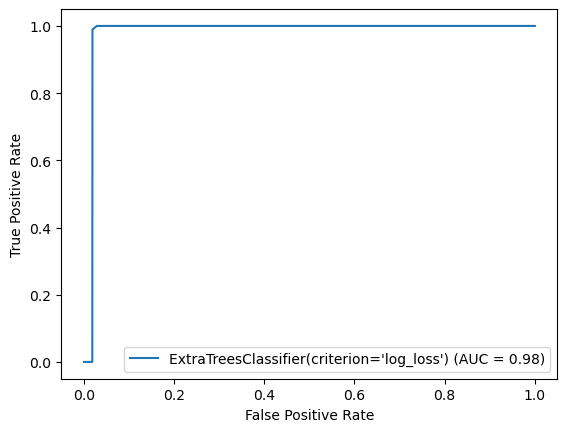

In [102]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds =roc_curve(y_test,pred,pos_label=52)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model1)
display.plot()

Save the model

In [103]:
import joblib
model=joblib.dump(fmodel,'Avocado Region.pkl')

In [104]:
import joblib
model=joblib.load('Avocado Region.pkl')
prediction=model.predict(x_test)
prediction

array([32., 17.,  8., ..., 25.,  8., 47.])

In [105]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=prediction
df['original']=a
df

prediction  original
0           32.0      32.0
1           17.0      17.0
2            8.0      17.0
3           12.0      12.0
4           25.0      25.0
...          ...       ...
5383        23.0      23.0
5384        36.0      36.0
5385        25.0      25.0
5386         8.0       8.0
5387        47.0      47.0

[5388 rows x 2 columns]

In [106]:
df2=pd.read_csv('avocado.csv')

In [107]:
df2

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

This Dataset contains 18249 rows and 14 columns.out of which 1 is target variable and remaining 13 are independent variables.

EDA(Exploratory Data Analysis)

In [108]:
df2.shape

(18249, 14)

In [109]:
df2.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [110]:
df2.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

check the data types

In [111]:
df2.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

check the null values

In [112]:
df2.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [113]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [114]:
for i in df2.columns:
    print(df2[i].value_counts())
    print('\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

In [115]:
df2['Date']=pd.to_datetime(df2['Date'],format='%Y-%m-%d')

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [117]:
df2.set_index('Date',inplace=True)

In [118]:
df2

Unnamed: 0  AveragePrice  Total Volume     4046       4225  \
Date                                                                     
2015-12-27           0          1.33      64236.62  1036.74   54454.85   
2015-12-20           1          1.35      54876.98   674.28   44638.81   
2015-12-13           2          0.93     118220.22   794.70  109149.67   
2015-12-06           3          1.08      78992.15  1132.00   71976.41   
2015-11-29           4          1.28      51039.60   941.48   43838.39   
...                ...           ...           ...      ...        ...   
2018-02-04           7          1.63      17074.83  2046.96    1529.20   
2018-01-28           8          1.71      13888.04  1191.70    3431.50   
2018-01-21           9          1.87      13766.76  1191.92    2452.79   
2018-01-14          10          1.93      16205.22  1527.63    2981.04   
2018-01-07          11          1.62      17489.58  2894.77    2356.13   

              4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Date                                                                  
2015-12-27   48.16     8696.87     8603.62       93.25          0.0   
2015-12-20   58.33     9505.56     9408.07       97.49          0.0   
2015-12-13  130.50     8145.35     8042.21      103.14          0.0   
2015-12-06   72.58     5811.16     5677.40      133.76          0.0   
2015-11-29   75.78     6183.95     5986.26      197.69          0.0   
...            ...         ...         ...         ...          ...   
2018-02-04    0.00    13498.67    13066.82      431.85          0.0   
2018-01-28    0.00     9264.84     8940.04      324.80          0.0   
2018-01-21  727.94     9394.11     9351.80       42.31          0.0   
2018-01-14  727.01    10969.54    10919.54       50.00          0.0   
2018-01-07  224.53    12014.15    11988.14       26.01          0.0   

                    type  year            region  
Date                                              
2015-12-27  conventional  2015            Albany  
2015-12-20  conventional  2015            Albany  
2015-12-13  conventional  2015            Albany  
2015-12-06  conventional  2015            Albany  
2015-11-29  conventional  2015            Albany  
...                  ...   ...               ...  
2018-02-04       organic  2018  WestTexNewMexico  
2018-01-28       organic  2018  WestTexNewMexico  
2018-01-21       organic  2018  WestTexNewMexico  
2018-01-14       organic  2018  WestTexNewMexico  
2018-01-07       organic  2018  WestTexNewMexico  

[18249 rows x 13 columns]

<Axes: ylabel='Date'>

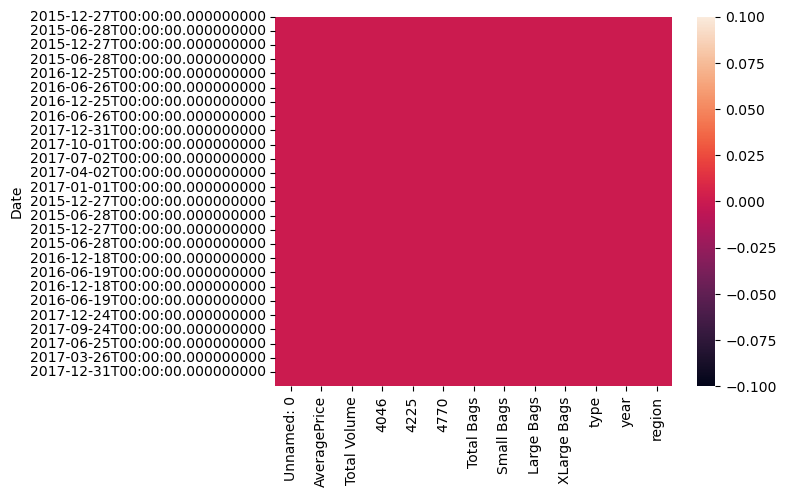

In [119]:
sns.heatmap(df2.isnull())

As we can clearly visualize that there is no missing data present in the dataset.

In [120]:
df2.nunique().to_frame('number of unique values')

number of unique values
Unnamed: 0                         53
AveragePrice                      259
Total Volume                    18237
4046                            17702
4225                            18103
4770                            12071
Total Bags                      18097
Small Bags                      17321
Large Bags                      15082
XLarge Bags                      5588
type                                2
year                                4
region                             54

In [121]:
df2['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

Encoding technique (here we are using encoding method to change categorical data to numerical data.)

In [122]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=oe.fit_transform(df2[i].values.reshape(-1,1))
        df2

In [123]:
df2

Unnamed: 0  AveragePrice  Total Volume     4046       4225  \
Date                                                                     
2015-12-27           0          1.33      64236.62  1036.74   54454.85   
2015-12-20           1          1.35      54876.98   674.28   44638.81   
2015-12-13           2          0.93     118220.22   794.70  109149.67   
2015-12-06           3          1.08      78992.15  1132.00   71976.41   
2015-11-29           4          1.28      51039.60   941.48   43838.39   
...                ...           ...           ...      ...        ...   
2018-02-04           7          1.63      17074.83  2046.96    1529.20   
2018-01-28           8          1.71      13888.04  1191.70    3431.50   
2018-01-21           9          1.87      13766.76  1191.92    2452.79   
2018-01-14          10          1.93      16205.22  1527.63    2981.04   
2018-01-07          11          1.62      17489.58  2894.77    2356.13   

              4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  \
Date                                                                        
2015-12-27   48.16     8696.87     8603.62       93.25          0.0   0.0   
2015-12-20   58.33     9505.56     9408.07       97.49          0.0   0.0   
2015-12-13  130.50     8145.35     8042.21      103.14          0.0   0.0   
2015-12-06   72.58     5811.16     5677.40      133.76          0.0   0.0   
2015-11-29   75.78     6183.95     5986.26      197.69          0.0   0.0   
...            ...         ...         ...         ...          ...   ...   
2018-02-04    0.00    13498.67    13066.82      431.85          0.0   1.0   
2018-01-28    0.00     9264.84     8940.04      324.80          0.0   1.0   
2018-01-21  727.94     9394.11     9351.80       42.31          0.0   1.0   
2018-01-14  727.01    10969.54    10919.54       50.00          0.0   1.0   
2018-01-07  224.53    12014.15    11988.14       26.01          0.0   1.0   

            year  region  
Date                      
2015-12-27  2015     0.0  
2015-12-20  2015     0.0  
2015-12-13  2015     0.0  
2015-12-06  2015     0.0  
2015-11-29  2015     0.0  
...          ...     ...  
2018-02-04  2018    53.0  
2018-01-28  2018    53.0  
2018-01-21  2018    53.0  
2018-01-14  2018    53.0  
2018-01-07  2018    53.0  

[18249 rows x 13 columns]

In [124]:
df2.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [125]:
df2.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               type          year        region  
count  18249.000000  18249.000000  18249.000000  
mean       0.499918   2016.147899     26.495644  
std        0.500014      0.939938     15.583788  
min        0.000000   2015.000000      0.000000  
25%        0.000000   2015.000000     13.000000  
50%        0.000000   2016.000000     26.000000  
75%        1.000000   2017.000000     40.000000  
max        1.000000   2018.000000     53.000000

This gives the stastical information of the numerical columns.the summary of the above dataset looks perfect.since there is no negative /invalid values present. Here Mean is same as Median no skwness present in the dataset. As we can see 75th percentile and Max values are high so there is outliers present in the dataset.

Data Visulization

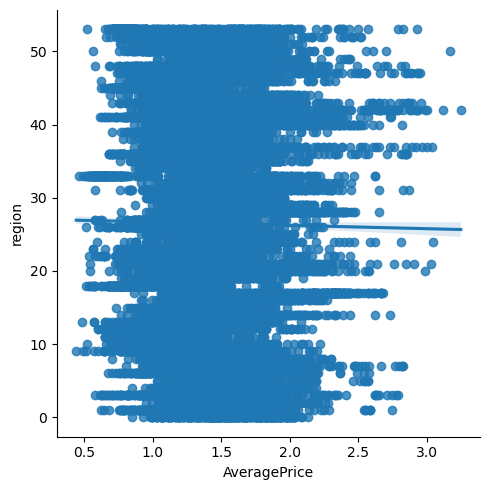

In [126]:
sns.lmplot(x='AveragePrice',y='region',data=df2,palette='colorblind')

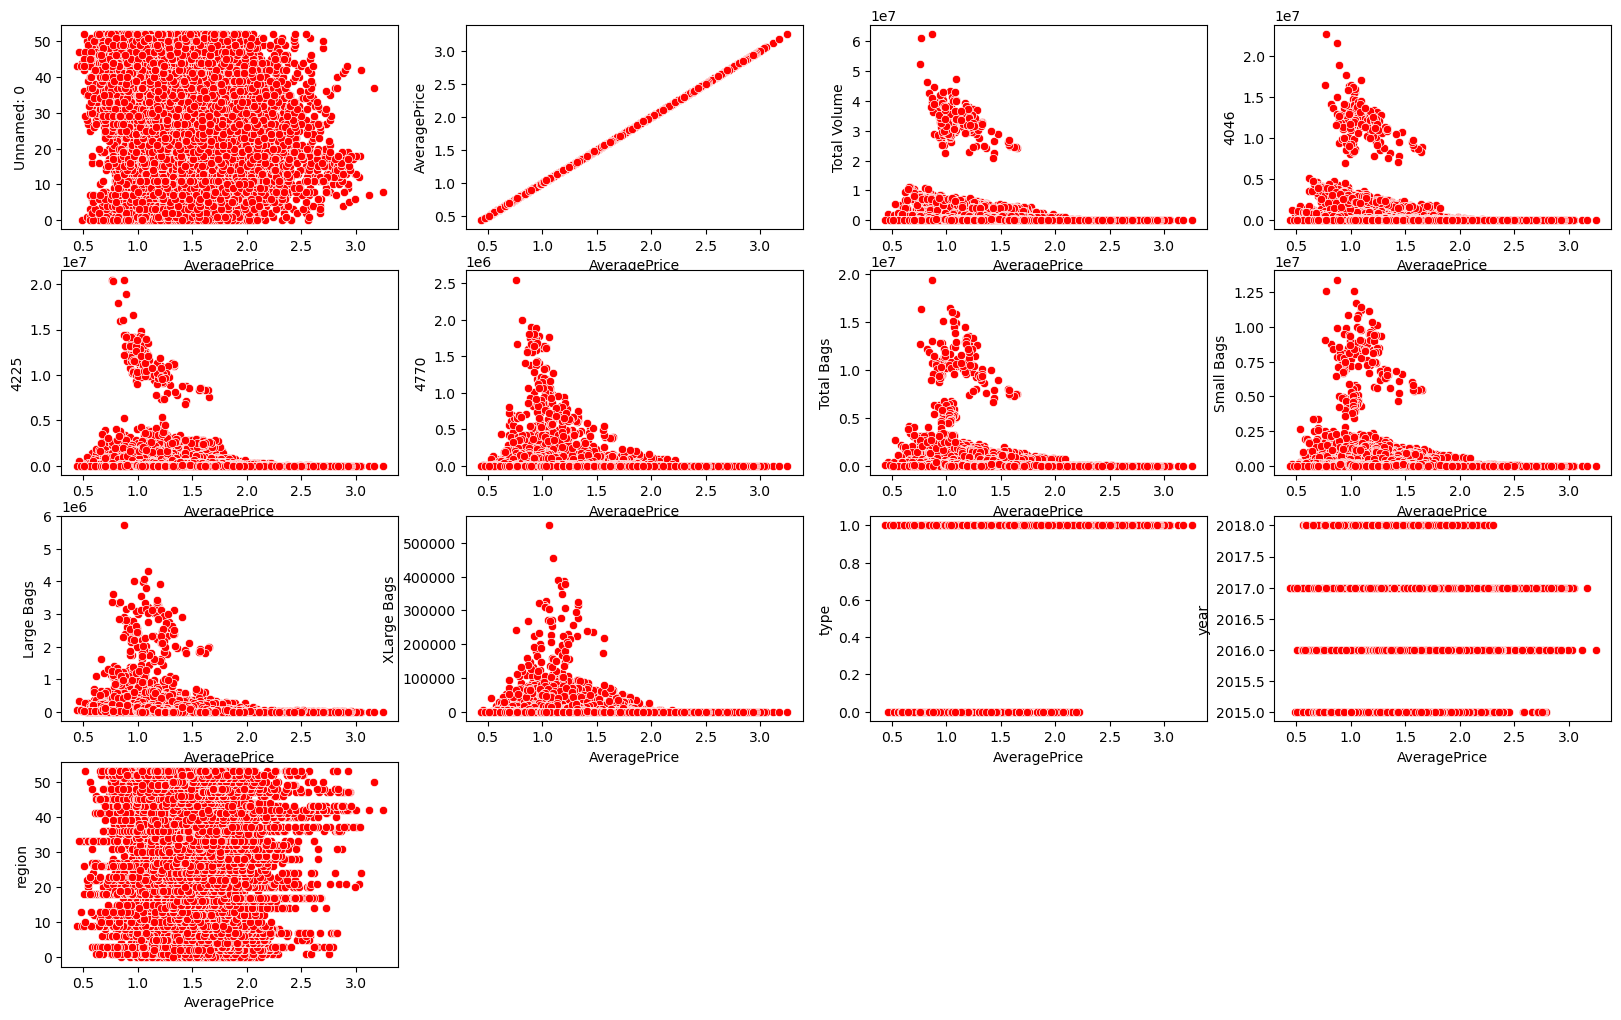

In [127]:
plt.figure(figsize=(20,25))
p=1
for i in df2:
    if p<=17:
        plt.subplot(8,4,p)
        sns.scatterplot(x='AveragePrice',y=i,data=df2,color='r')
        plt.xlabel('AveragePrice')
        plt.ylabel(i)
    p+=1
plt.show()

Here we are checking outliers in the data.

Unnamed: 0         Axes(0.125,0.786098;0.0824468x0.0939024)
AveragePrice    Axes(0.223936,0.786098;0.0824468x0.0939024)
Total Volume    Axes(0.322872,0.786098;0.0824468x0.0939024)
4046            Axes(0.421809,0.786098;0.0824468x0.0939024)
4225            Axes(0.520745,0.786098;0.0824468x0.0939024)
4770            Axes(0.619681,0.786098;0.0824468x0.0939024)
Total Bags      Axes(0.718617,0.786098;0.0824468x0.0939024)
Small Bags      Axes(0.817553,0.786098;0.0824468x0.0939024)
Large Bags         Axes(0.125,0.673415;0.0824468x0.0939024)
XLarge Bags     Axes(0.223936,0.673415;0.0824468x0.0939024)
type            Axes(0.322872,0.673415;0.0824468x0.0939024)
year            Axes(0.421809,0.673415;0.0824468x0.0939024)
region          Axes(0.520745,0.673415;0.0824468x0.0939024)
dtype: object

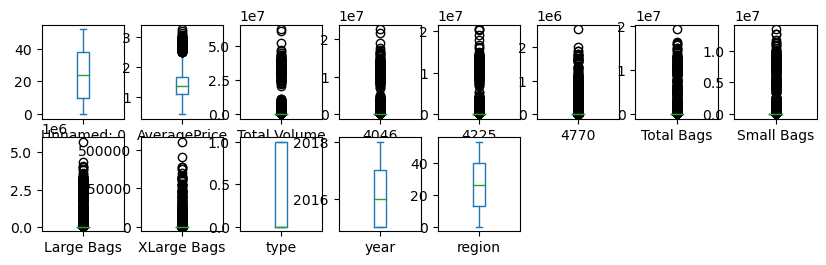

In [128]:
df2.plot(kind='box',subplots=True,layout=(7,8),figsize=(10,10))

As you can see outliers are present in this dataset to remove the outliers we use Zscore method to remove the outliers.

In [129]:
from scipy.stats import zscore
out_features=df2[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out_features))
z

Total Volume      4046      4225      4770  Total Bags  \
Date                                                                 
2015-12-27      0.227716  0.230816  0.199902  0.212091    0.234170   
2015-12-20      0.230427  0.231103  0.208054  0.211997    0.233350   
2015-12-13      0.212085  0.231007  0.154478  0.211325    0.234730   
2015-12-06      0.223444  0.230741  0.185350  0.211864    0.237096   
2015-11-29      0.231538  0.230891  0.208719  0.211834    0.236718   
...                  ...       ...       ...       ...         ...   
2018-02-04      0.241373  0.230017  0.243857  0.212540    0.229301   
2018-01-28      0.242296  0.230693  0.242277  0.212540    0.233594   
2018-01-21      0.242331  0.230693  0.243090  0.205766    0.233463   
2018-01-14      0.241625  0.230428  0.242651  0.205774    0.231866   
2018-01-07      0.241253  0.229347  0.243170  0.210450    0.230807   

            Small Bags  Large Bags  XLarge Bags  
Date                                             
2015-12-27    0.232647    0.222352      0.17558  
2015-12-20    0.231568    0.222335      0.17558  
2015-12-13    0.233399    0.222311      0.17558  
2015-12-06    0.236568    0.222186      0.17558  
2015-11-29    0.236154    0.221924      0.17558  
...                ...         ...          ...  
2018-02-04    0.226665    0.220964      0.17558  
2018-01-28    0.232196    0.221403      0.17558  
2018-01-21    0.231644    0.222561      0.17558  
2018-01-14    0.229543    0.222529      0.17558  
2018-01-07    0.228111    0.222628      0.17558  

[18249 rows x 8 columns]

In [130]:
threshold=3
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [131]:
df3=df2[(z<3).all(axis=1)]

In [132]:
df3.shape

(17782, 13)

In [133]:
print('old dataframe:',df2.shape[0])
print('new dataframe:',df3.shape[0])

old dataframe: 18249
new dataframe: 17782


In [134]:
print('datalosspercentage:',((df2.shape[0]-df3.shape[0])/df2.shape[0])*100)

datalosspercentage: 2.55904433119623


In [135]:
df3

Unnamed: 0  AveragePrice  Total Volume     4046       4225  \
Date                                                                     
2015-12-27           0          1.33      64236.62  1036.74   54454.85   
2015-12-20           1          1.35      54876.98   674.28   44638.81   
2015-12-13           2          0.93     118220.22   794.70  109149.67   
2015-12-06           3          1.08      78992.15  1132.00   71976.41   
2015-11-29           4          1.28      51039.60   941.48   43838.39   
...                ...           ...           ...      ...        ...   
2018-02-04           7          1.63      17074.83  2046.96    1529.20   
2018-01-28           8          1.71      13888.04  1191.70    3431.50   
2018-01-21           9          1.87      13766.76  1191.92    2452.79   
2018-01-14          10          1.93      16205.22  1527.63    2981.04   
2018-01-07          11          1.62      17489.58  2894.77    2356.13   

              4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  \
Date                                                                        
2015-12-27   48.16     8696.87     8603.62       93.25          0.0   0.0   
2015-12-20   58.33     9505.56     9408.07       97.49          0.0   0.0   
2015-12-13  130.50     8145.35     8042.21      103.14          0.0   0.0   
2015-12-06   72.58     5811.16     5677.40      133.76          0.0   0.0   
2015-11-29   75.78     6183.95     5986.26      197.69          0.0   0.0   
...            ...         ...         ...         ...          ...   ...   
2018-02-04    0.00    13498.67    13066.82      431.85          0.0   1.0   
2018-01-28    0.00     9264.84     8940.04      324.80          0.0   1.0   
2018-01-21  727.94     9394.11     9351.80       42.31          0.0   1.0   
2018-01-14  727.01    10969.54    10919.54       50.00          0.0   1.0   
2018-01-07  224.53    12014.15    11988.14       26.01          0.0   1.0   

            year  region  
Date                      
2015-12-27  2015     0.0  
2015-12-20  2015     0.0  
2015-12-13  2015     0.0  
2015-12-06  2015     0.0  
2015-11-29  2015     0.0  
...          ...     ...  
2018-02-04  2018    53.0  
2018-01-28  2018    53.0  
2018-01-21  2018    53.0  
2018-01-14  2018    53.0  
2018-01-07  2018    53.0  

[17782 rows x 13 columns]

Checking Skewness

In [136]:
df2.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

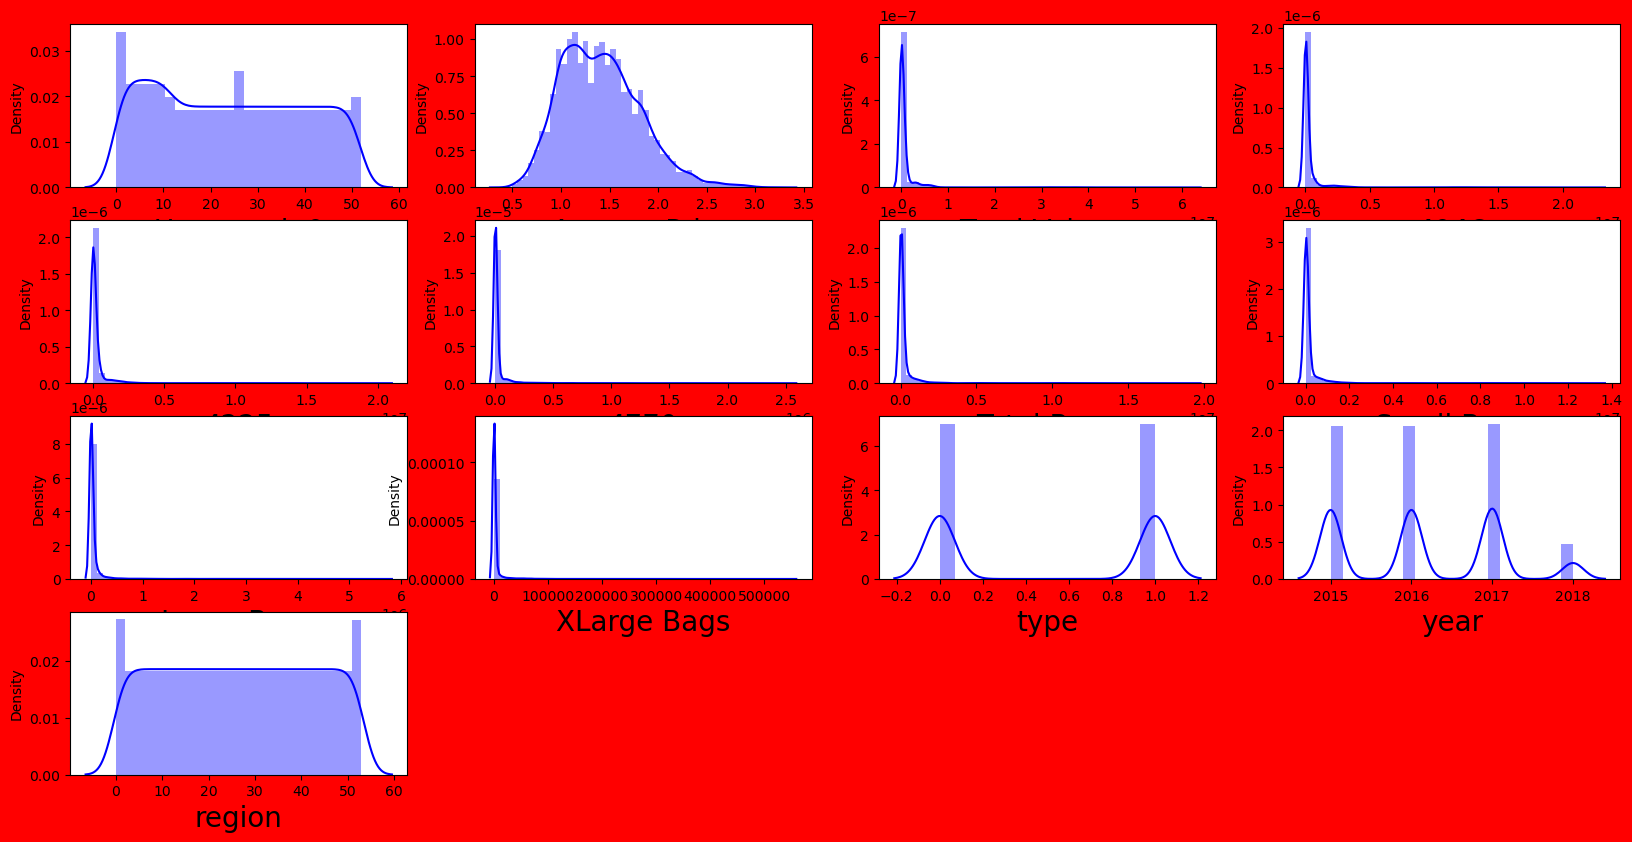

In [137]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df2:
    if num<=24:
        ax=plt.subplot(10,4,num)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

from above distribution plots we can notice that data in most looks there is skewness present in some of the columns so we treate skewness we use Squareroot or cuberoot method to remove skewness.



In [138]:
df2['Total Volume']=np.cbrt(df2['Total Volume'])

In [139]:
df2['XLarge Bags']=np.cbrt(df2['XLarge Bags'])

In [140]:
df2['Large Bags']=np.cbrt(df2['Large Bags'])

In [141]:
df2['Small Bags']=np.cbrt(df2['Small Bags'])

In [142]:
df2['4770']=np.cbrt(df2['4770'])

In [143]:
df2['4225']=np.cbrt(df2['4225'])

In [144]:
df2['4046']=np.cbrt(df2['4046'])

In [145]:
df2['Total Bags']=np.cbrt(df2['Total Bags'])

In [146]:
df2.skew()

Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [147]:
df2['Total Volume']=np.sqrt(df2['Total Volume'])

In [148]:
df2['XLarge Bags']=np.sqrt(df2['XLarge Bags'])

In [149]:
df2['Large Bags']=np.sqrt(df2['Large Bags'])

In [150]:
df2['Small Bags']=np.sqrt(df2['Small Bags'])

In [151]:
df2['4770']=np.sqrt(df2['4770'])

In [152]:
df2['4225']=np.cbrt(df2['4225'])

In [153]:
df2['4046']=np.cbrt(df2['4046'])

In [154]:
df2['Total Bags']=np.sqrt(df2['Total Bags'])

In [155]:
df2.skew()

Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    0.950027
4046            0.296549
4225            0.248376
4770            0.605972
Total Bags      0.890696
Small Bags      0.690221
Large Bags      0.316832
XLarge Bags     1.377477
type            0.000329
year            0.215339
region          0.000030
dtype: float64

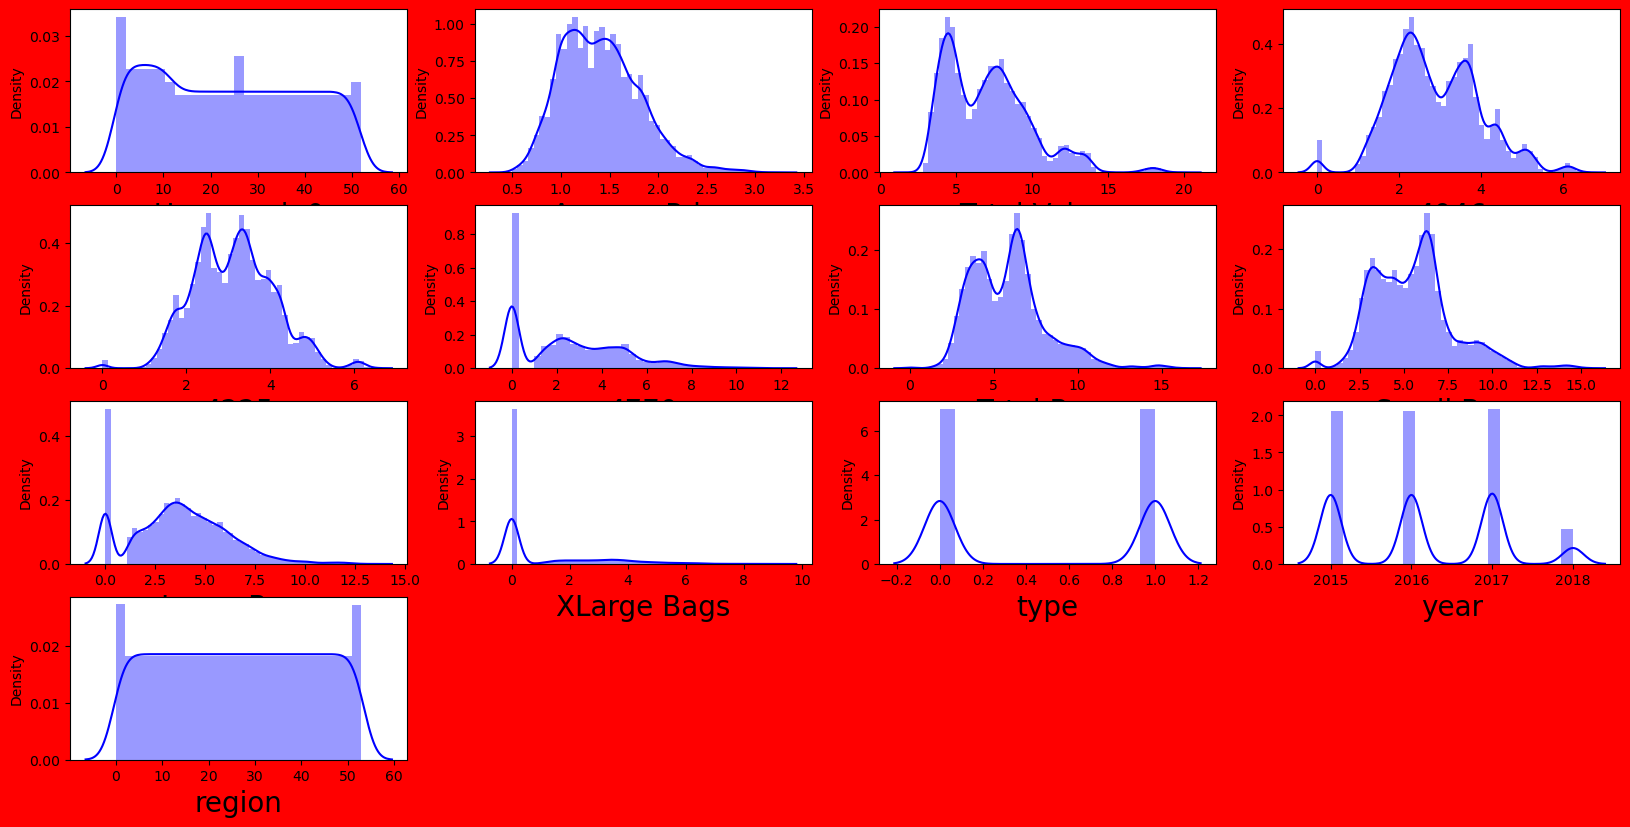

In [156]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df2:
    if num<=24:
        ax=plt.subplot(10,4,num)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

from above distribution plots we can notice that data in most looks normal columns.

Here we are checking correlation of the dataset.

In [157]:
df2.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.010805  0.017693  0.027400   
AveragePrice   -0.133008      1.000000     -0.554411 -0.552586 -0.460275   
Total Volume    0.010805     -0.554411      1.000000  0.901371  0.930542   
4046            0.017693     -0.552586      0.901371  1.000000  0.790908   
4225            0.027400     -0.460275      0.930542  0.790908  1.000000   
4770            0.044337     -0.495709      0.850977  0.771296  0.826159   
Total Bags     -0.028622     -0.541185      0.960835  0.839858  0.856506   
Small Bags     -0.035509     -0.491805      0.936593  0.820647  0.830197   
Large Bags     -0.026673     -0.481702      0.741806  0.663025  0.668378   
XLarge Bags    -0.047670     -0.375544      0.713129  0.637709  0.645217   
type           -0.000288      0.615845     -0.749134 -0.712142 -0.736521   
year           -0.171667      0.093197      0.066411  0.011931  0.007077   
region         -0.000489     -0.011716      0.133983  0.198612  0.084083   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.044337   -0.028622   -0.035509   -0.026673    -0.047670   
AveragePrice -0.495709   -0.541185   -0.491805   -0.481702    -0.375544   
Total Volume  0.850977    0.960835    0.936593    0.741806     0.713129   
4046          0.771296    0.839858    0.820647    0.663025     0.637709   
4225          0.826159    0.856506    0.830197    0.668378     0.645217   
4770          1.000000    0.800985    0.794867    0.603831     0.688295   
Total Bags    0.800985    1.000000    0.966170    0.785503     0.703402   
Small Bags    0.794867    0.966170    1.000000    0.656213     0.690372   
Large Bags    0.603831    0.785503    0.656213    1.000000     0.532932   
XLarge Bags   0.688295    0.703402    0.690372    0.532932     1.000000   
type         -0.745238   -0.691603   -0.694731   -0.508589    -0.619375   
year         -0.049642    0.191710    0.177084    0.196262     0.167458   
region        0.071069    0.138908    0.119202    0.153963     0.022754   

                  type      year    region  
Unnamed: 0   -0.000288 -0.171667 -0.000489  
AveragePrice  0.615845  0.093197 -0.011716  
Total Volume -0.749134  0.066411  0.133983  
4046         -0.712142  0.011931  0.198612  
4225         -0.736521  0.007077  0.084083  
4770         -0.745238 -0.049642  0.071069  
Total Bags   -0.691603  0.191710  0.138908  
Small Bags   -0.694731  0.177084  0.119202  
Large Bags   -0.508589  0.196262  0.153963  
XLarge Bags  -0.619375  0.167458  0.022754  
type          1.000000 -0.000032 -0.000280  
year         -0.000032  1.000000 -0.000055  
region       -0.000280 -0.000055  1.000000

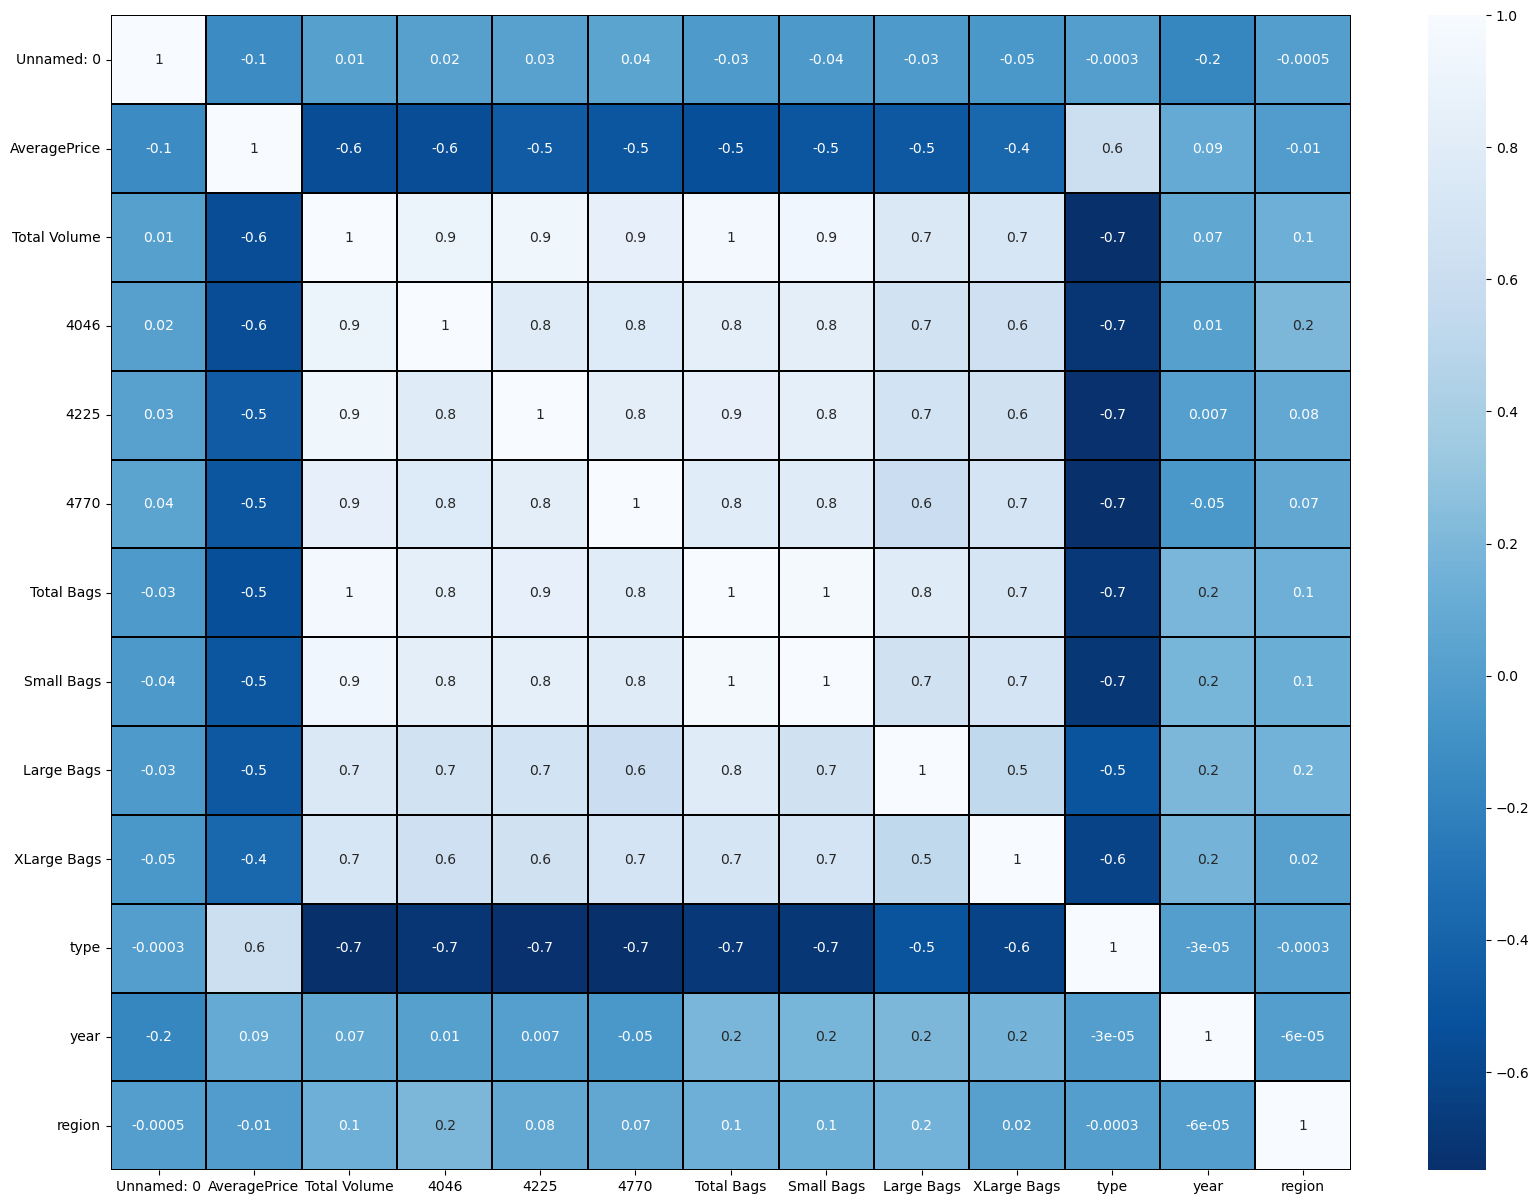

In [158]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [189]:
x1=df2.drop('AveragePrice',axis=1)

In [190]:
y1=df2['AveragePrice']

Feature scaling using StandardScaler method.

In [191]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)


In [192]:
x1

Unnamed: 0  Total Volume      4046      4225      4770  Total Bags  \
0       -1.565327     -0.275399 -0.678881  0.247619 -0.310250   -0.601460   
1       -1.500730     -0.334355 -0.773376  0.170103 -0.283521   -0.570570   
2       -1.436133     -0.031861 -0.737814  0.532667 -0.161360   -0.623930   
3       -1.371536     -0.195601 -0.659010  0.359339 -0.251967   -0.735928   
4       -1.306939     -0.360978 -0.700447  0.163131 -0.245601   -0.715776   
...           ...           ...       ...       ...       ...         ...   
18244   -1.113149     -0.726346 -0.519922 -0.915081 -1.134031   -0.444162   
18245   -1.048552     -0.788107 -0.647302 -0.690885 -1.134031   -0.579528   
18246   -0.983955     -0.790683 -0.647260 -0.786473  0.161298   -0.574693   
18247   -0.919358     -0.742176 -0.589777 -0.731382  0.161022   -0.519831   
18248   -0.854761     -0.719032 -0.434205 -0.797682 -0.069292   -0.486977   

       Small Bags  Large Bags  XLarge Bags      type      year    region  
0       -0.426584   -0.704071     -0.63598 -0.999836 -1.221282 -1.700252  
1       -0.395948   -0.697321     -0.63598 -0.999836 -1.221282 -1.700252  
2       -0.449411   -0.688697     -0.63598 -0.999836 -1.221282 -1.700252  
3       -0.563210   -0.647836     -0.63598 -0.999836 -1.221282 -1.700252  
4       -0.546321   -0.583006     -0.63598 -0.999836 -1.221282 -1.700252  
...           ...         ...          ...       ...       ...       ...  
18244   -0.279353   -0.439952     -0.63598  1.000164  1.970504  1.700811  
18245   -0.413493   -0.494276     -0.63598  1.000164  1.970504  1.700811  
18246   -0.398019   -0.816052     -0.63598  1.000164  1.970504  1.700811  
18247   -0.343860   -0.793602     -0.63598  1.000164  1.970504  1.700811  
18248   -0.310553   -0.878010     -0.63598  1.000164  1.970504  1.700811  

[18249 rows x 12 columns]

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

vif values      features
0     1.045867    Unnamed: 0
1    63.023251  Total Volume
2     7.382414          4046
3    11.428742          4225
4     4.528842          4770
5    54.741742    Total Bags
6    26.759952    Small Bags
7     4.547552    Large Bags
8     2.351338   XLarge Bags
9     2.785409          type
10    1.401024          year
11    1.102693        region

As we can seee there is no multicorrelation present in the dataset so we can now ahead of model building.

Model Bulding

As you can see this is Regression problem in this we have continous data so we use regression model here.

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [195]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    pred=lr.predict(x1_test)
    acc=r2_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Maximum r2 score is',maxAccu,'On random states',maxRs)

Maximum r2 score is 0.547046248077918 On random states 20


In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [197]:
Lr=LinearRegression()
Lr.fit(x1_train,y1_train)
pred_Lr=Lr.predict(x1_test)
pred_train=Lr.predict(x1_train)
print(Lr)
print('R2_score:',r2_score(y1_test,pred_Lr))
print('R2_score on train data:',r2_score(y1_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y1_test,pred_Lr))
print('Mean squared error:',mean_squared_error(y1_test,pred_Lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_Lr)))

LinearRegression()
R2_score: 0.5166022543613799
R2_score on train data: 52.72634582508569
Mean absolute error: 0.2160515673496453
Mean squared error: 0.07708529377122553
Root mean squared error: 0.27764238468077157


In [198]:
Rfr=RandomForestRegressor()
Rfr.fit(x1_train,y1_train)
pred_Rfr=Rfr.predict(x1_test)
pred_train=Rfr.predict(x1_train)
print(Rfr)
print('R2_score:',r2_score(y1_test,pred_Rfr))
print('R2_score on train data:',r2_score(y1_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y1_test,pred_Rfr))
print('Mean squared error:',mean_squared_error(y1_test,pred_Rfr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_Rfr)))

RandomForestRegressor()
R2_score: 0.9052610811277821
R2_score on train data: 98.56224995662997
Mean absolute error: 0.08496065753424657
Mean squared error: 0.015107595057534248
Root mean squared error: 0.12291295724021226


In [199]:
knn= KNN()
knn.fit(x1_train,y1_train)
pred_knn=knn.predict(x1_test)
pred_train=knn.predict(x1_train)
print(knn)
print('R2_score:',r2_score(y1_test,pred_knn))
print('R2_score on train data:',r2_score(y1_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y1_test,pred_knn))
print('Mean squared error:',mean_squared_error(y1_test,pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.8844720140851414
R2_score on train data: 92.74032960090098
Mean absolute error: 0.09529095890410959
Mean squared error: 0.018422735342465756
Root mean squared error: 0.1357303773753899


In [200]:
gbr=GradientBoostingRegressor()
gbr.fit(x1_train,y1_train)
pred_gbr=gbr.predict(x1_test)
pred_train=gbr.predict(x1_train)
print(gbr)
print('R2_score:',r2_score(y1_test,pred_gbr))
print('R2_score on train data:',r2_score(y1_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y1_test,pred_gbr))
print('Mean squared error:',mean_squared_error(y1_test,pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_gbr)))

GradientBoostingRegressor()
R2_score: 0.7506702253975774
R2_score on train data: 75.87322191336389
Mean absolute error: 0.15021347787911696
Mean squared error: 0.03975951293639146
Root mean squared error: 0.19939787595757247


In [201]:
ls=Lasso(alpha=0.001)
ls.fit(x1_train,y1_train)
pred_ls=ls.predict(x1_test)
pred_train=ls.predict(x1_train)
print(ls)
print('R2_score:',r2_score(y1_test,pred_ls))
print('R2_score on train data:',r2_score(y1_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y1_test,pred_ls))
print('Mean squared error:',mean_squared_error(y1_test,pred_ls))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_ls)))

Lasso(alpha=0.001)
R2_score: 0.5162129206991586
R2_score on train data: 52.62721212359729
Mean absolute error: 0.2156095464032726
Mean squared error: 0.07714737908295513
Root mean squared error: 0.2777541702350392


In [202]:
rg=Ridge(alpha=0.0001)
rg.fit(x1_train,y1_train)
pred_rg=rg.predict(x1_test)
pred_train=rg.predict(x1_train)
print(rg)
print('R2_score:',r2_score(y1_test,pred_rg))
print('R2_score on train data:',r2_score(y1_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y1_test,pred_rg))
print('Mean squared error:',mean_squared_error(y1_test,pred_rg))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_rg)))

Ridge(alpha=0.0001)
R2_score: 0.5166022559258965
R2_score on train data: 52.72634582508524
Mean absolute error: 0.21605156632152794
Mean squared error: 0.077085293521739
Root mean squared error: 0.2776423842314768


In [203]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
pred_dtr=dtr.predict(x1_test)
pred_train=dtr.predict(x1_train)
print(dtr)
print('R2_score:',r2_score(y1_test,pred_dtr))
print('R2_score on train data:',r2_score(y1_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y1_test,pred_dtr))
print('Mean squared error:',mean_squared_error(y1_test,pred_dtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.786642645620192
R2_score on train data: 100.0
Mean absolute error: 0.11771780821917807
Mean squared error: 0.0340231506849315
Root mean squared error: 0.1844536545719046


In [204]:
etr=ExtraTreesRegressor()
etr.fit(x1_train,y1_train)
pred_etr=etr.predict(x1_test)
pred_train=etr.predict(x1_train)
print(etr)
print('R2_score:',r2_score(y1_test,pred_etr))
print('R2_score on train data:',r2_score(y1_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y1_test,pred_etr))
print('Mean squared error:',mean_squared_error(y1_test,pred_etr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.9247538393654707
R2_score on train data: 100.0
Mean absolute error: 0.07481298630136989
Mean squared error: 0.011999171386301367
Root mean squared error: 0.10954072934895663


Now we can check cross valdiation of all the model.

In [205]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lr,x1,y1,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y1_test,pred_Lr)-score.mean())*100)

[-0.35360213  0.14955665  0.40264161  0.20530666  0.18619984]
0.11802052577029279
difference b/w R2_score and cross_val_score is: 39.858172859108706


In [206]:
score2=cross_val_score(knn,x1,y1)
print(score2)
print(score2.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y1_test,pred_knn)-score2.mean())*100)

[-0.61908122  0.20605468  0.43794423 -0.09812225 -0.11363476]
-0.03736786639644065
difference b/w R2_score and cross_val_score is: 92.1839880481582


In [207]:
score3=cross_val_score(gbr,x1,y1)
print(score3)
print(score3.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y1_test,pred_gbr)-score3.mean())*100)

[0.11521807 0.55852566 0.63585175 0.28147082 0.23016988]
0.3642472357217703
difference b/w R2_score and cross_val_score is: 38.642298967580714


In [208]:
score8=cross_val_score(Rfr,x1,y1)
print(score8)
print(score8.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y1_test,pred_Rfr)-score8.mean())*100)

[-0.22624573  0.49022217  0.59245506  0.09909424  0.00153023]
0.19141119363176556
difference b/w R2_score and cross_val_score is: 71.38498874960166


In [209]:
score4=cross_val_score(ls,x1,y1)
print(score4)
print(score4.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y1_test,pred_ls)-score4.mean())*100)

[-0.37821095  0.15177229  0.4079583   0.21049584  0.17567814]
0.113538723259234
difference b/w R2_score and cross_val_score is: 40.26741974399246


In [210]:
score5=cross_val_score(rg,x1,y1)
print(score5)
print(score5.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y1_test,pred_rg)-score5.mean())*100)

[-0.35360214  0.14955665  0.40264162  0.20530669  0.18619983]
0.11802052911090902
difference b/w R2_score and cross_val_score is: 39.85817268149875


In [211]:
score6=cross_val_score(dtr,x1,y1)
print(score6)
print(score6.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y1_test,pred_dtr)-score6.mean())*100)

[-0.8456324   0.17573638  0.18062791 -0.48850834 -0.36000544]
-0.2675563792394962
difference b/w R2_score and cross_val_score is: 105.41990248596882


In [212]:
score7=cross_val_score(etr,x1,y1)
print(score7)
print(score7.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y1_test,pred_etr)-score7.mean())*100)

[-0.06643961  0.51276385  0.63945863  0.25392988  0.08086938]
0.2841164265122078
difference b/w R2_score and cross_val_score is: 64.06374128532629


In [213]:
from sklearn.model_selection import RandomizedSearchCV
param={'loss':['squared_error', 'absolute_error']}
rscv=RandomizedSearchCV(GradientBoostingRegressor(),param,cv=3)
rscv.fit(x_train,y_train)
rscv.best_params_

{'loss': 'squared_error'}

In [214]:
model=GradientBoostingRegressor(loss='squared_error')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


r2_score: 0.3907715968731966
Mean absolute error: 9.874475250534257
Mean squared error: 145.71896709121435
Root mean squared error: 12.071411147467986


Saving the Model

In [215]:
import joblib
import pickle
filename='Avocado Region1'
pickle.dump(model,open(filename,'wb'))

In [216]:
import pickle
load_model=pickle.load(open('Avocado Region1','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

39.077159687319664


Conclusion

In [217]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

In [218]:
conclusion

0          1          2          3          4          5     \
Predicted  24.292541  15.955287  18.015258  26.049822  32.688092  13.548125   
Original   32.000000  17.000000  17.000000  12.000000  25.000000   0.000000   

                6          7          8          9     ...       5378  \
Predicted  20.260713  12.412123  31.582442  21.582304  ...  21.583936   
Original    3.000000   4.000000  25.000000  23.000000  ...   7.000000   

                5379       5380       5381       5382       5383       5384  \
Predicted  30.846107  32.011654  46.361524  20.842725  22.250303  31.071599   
Original   29.000000  28.000000  52.000000   5.000000  23.000000  36.000000   

                5385      5386       5387  
Predicted  25.707535  6.555336  33.775389  
Original   25.000000  8.000000  47.000000  

[2 rows x 5388 columns]